<a href="https://colab.research.google.com/github/roymatza/FIFA22_Dataset_Analysis/blob/main/FIFA22_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Statistics 2 - Final Project**
**By: Roy Matza**




## FIFA22 Dataset

<u>Description</u>:

[FIFA22 Players Dataset](https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset) for the Career Mode from FIFA 15 to FIFA 22 videogames. The data allow multiple comparisons for the same players across the last 8 versions of the videogame. Among the attributes there are physical measures, financial matters concerning the players, the player history and his role in the team.

<u>Chosen Attributes</u>:

<ul>
<li><b>sofifa_id</b> -  unique FIFA player ID (int - continuous)</li>
<li><b>long_name</b> -  player long name</li>
<li><b>overall</b> - FIFA's total score (int - continuous)</li>
<li><b>wage_eur</b> - yearly wage in EUR (int - continuous)</li>
<li><b>age</b> - player age (int continuous)</li>
<li><b>height_cm</b>  - player height in CM (int - continuous)</li>
<li><b>weight_kg</b> - player weight in KG (int - continuous)</li>
<li><b>league_name</b> (str catogerial)</li>
<li><b>club_name</b> - league name of the club (str - catogerial)</li>
<li><b>club_position</b> - player position in the club (e.g. SUB means substitute, RES means reserve) (str - catogerial)</li>
<li><b>preferred_foot</b> - the player's preferred foot (str - binary)</li>
<li><b>is_starter</b> - whether the player is in the starting lineup (all club positions except reserve or substitute) (bool - binary)</li>
<li><b>physic</b> - player's 'physic' attribute (int - continuous)</li>
</ul>

# **Part 1**



## Data Preprocessing

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os
import warnings
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import math
import random

warnings.filterwarnings( "ignore" )
IN_COLAB = True
try:
  import google.colab
except:
  IN_COLAB = False

In [ ]:
if IN_COLAB:  #For colab only!
  os.environ['KAGGLE_USERNAME'] = 'matzaroy123'
  os.environ['KAGGLE_KEY'] = 'b292798adb72fc1cabf8ca5df78444e9'
  #!pip install kaggle #install the kaggle library
  !kaggle datasets download --force -d {'stefanoleone992/fifa-22-complete-player-dataset'} -p /data

 79% 86.0M/109M [00:00<00:00, 311MB/s]
100% 109M/109M [00:00<00:00, 303MB/s] 


In [ ]:
  !unzip -n '/data/fifa-22-complete-player-dataset' -d '/data'
  %rm '/data/fifa-22-complete-player-dataset.zip'
  %cd /data

Archive:  /data/fifa-22-complete-player-dataset.zip
/data


## Data preparation

In [ ]:
def customized_data():
    #read all csv files
    # for i in range (15, 23): #15,...,22
    #     globals()[f"df_{i}"] = pd.read_csv (f"players_{i}.csv",
    #                                          low_memory=False)
    #     globals()[f"df_{i}"]['year'] = f"20{i}"
    #     print (f"Dataframe containing 20{i} historical statistics was read")

    #read 2022 data file
    df_2022 = pd.read_csv("players_22.csv", low_memory=False)

    #create is_starter attribute
    df_2022['is_starter'] = ~df_2022['club_position'].isin(['SUB','RES'])

    #keep the following columns
    kept_columns = ['sofifa_id','long_name','overall','wage_eur','age','height_cm','weight_kg','league_name','club_name','club_position','preferred_foot','physic','is_starter']
    df_final = df_2022[kept_columns]
    print (f"Reduced features from dataframe")

    #return the merged data
    return df_final

In [ ]:
df = customized_data()
df.head()

Reduced features from dataframe


,sofifa_id,long_name,overall,wage_eur,age,height_cm,weight_kg,league_name,club_name,club_position,preferred_foot,physic,is_starter
0,158023,Lionel Andrés Messi Cuccittini,93,320000.0,34,170,72,French Ligue 1,Paris Saint-Germain,RW,Left,65.0,True
1,188545,Robert Lewandowski,92,270000.0,32,185,81,German 1. Bundesliga,FC Bayern München,ST,Right,82.0,True
2,20801,Cristiano Ronaldo dos Santos Aveiro,91,270000.0,36,187,83,English Premier League,Manchester United,ST,Right,75.0,True
3,190871,Neymar da Silva Santos Júnior,91,270000.0,29,175,68,French Ligue 1,Paris Saint-Germain,LW,Right,63.0,True
4,192985,Kevin De Bruyne,91,350000.0,30,181,70,English Premier League,Manchester City,RCM,Right,78.0,True


## Feature Analysis

In [ ]:
def statistics_info(data,cols):
  '''create a statistical summary for numerical variables'''
  for col in cols:
    print(f"\033[1m {col:_^45} \033[0m")
    display(pd.DataFrame(data[col].describe().to_dict(), index=[col]))

In [ ]:
def show_barplot(data,cols,top=None):
    for col in cols:
      """create bar plot for categorical variables"""
      plt.figure(figsize=(10,4.5))
      data_col = data[col].value_counts().reset_index()
      if top is not None:
        data_col = data_col.head(top)
      sns.barplot(data=data_col, x='index', y=col)
      plt.xticks(rotation=90)
      plt.title(f'Distribution of {col} variable')
      plt.xlabel(col)
      plt.ylabel('Quantity')
      plt.show()

In [ ]:
def missing_values_per_column(data):
  '''show number of missing values for each variable'''
  total_number = len(data)
  for col in data:
    null_number = data[col].isnull().sum()
    print(f"{col} | Missing values: {null_number}/{total_number}")

In [ ]:
def show_pie_chart(data, cols):
    """create pie chart to describe binary variable"""
    for col in cols:
      data_col = data[col].value_counts().reset_index()
      plt.figure(figsize=(6,6))
      patches, texts, autotexts = plt.pie(data_col[col], explode= (0.1,0), labels=data_col['index'], autopct='%1.1f%%',
                                          shadow=True, startangle=90, textprops={'fontsize': 14},
                                        colors=['salmon', 'deepskyblue'])
      plt.title(col, fontsize=20)
      texts[0].set_fontsize(15)
      texts[1].set_fontsize(15)

    plt.show()

In [ ]:
def create_box_plot(data, col_name):
    '''create box plot of box plot for numeric varible'''
    fig, (ax) = plt.subplots(1, figsize=(12, 4.5))
    ax = sns.boxplot(data=data, x=col_name, orient='v',
                     showmeans=True,
                     meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"10"}, ax=ax)
    # ax.set(title='Boxplot')
    fig.suptitle(f'Distribution of: {col_name}')
    plt.show()

In [ ]:
def create_numeric_histogram(data, col_name, bins):
  '''create histogram for numeric varible'''
  fig, (ax) = plt.subplots(1, figsize=(12, 4.5))
  data[col_name].plot.hist(alpha=0.5, bins=bins, ax=ax)
  fig.suptitle(f'Histogram of: {col_name}')
  plt.show()

## Analysis

*Description of numeric variables*

In [ ]:
statistics_info(df, ['overall','wage_eur','age','height_cm','weight_kg','physic'])

 ___________________overall___________________ 


,count,mean,std,min,25%,50%,75%,max
overall,19239.0,65.772182,6.880232,47.0,61.0,66.0,70.0,93.0


 __________________wage_eur___________________ 


,count,mean,std,min,25%,50%,75%,max
wage_eur,19178.0,9017.989363,19470.176724,500.0,1000.0,3000.0,8000.0,350000.0


 _____________________age_____________________ 


,count,mean,std,min,25%,50%,75%,max
age,19239.0,25.210822,4.748235,16.0,21.0,25.0,29.0,54.0


 __________________height_cm__________________ 


,count,mean,std,min,25%,50%,75%,max
height_cm,19239.0,181.299704,6.863179,155.0,176.0,181.0,186.0,206.0


 __________________weight_kg__________________ 


,count,mean,std,min,25%,50%,75%,max
weight_kg,19239.0,74.943032,7.069434,49.0,70.0,75.0,80.0,110.0


 ___________________physic____________________ 


,count,mean,std,min,25%,50%,75%,max
physic,17107.0,64.823289,9.791886,29.0,59.0,66.0,72.0,90.0


*Missing values*

In [ ]:
missing_values_per_column(df)

sofifa_id | Missing values: 0/19239
long_name | Missing values: 0/19239
overall | Missing values: 0/19239
wage_eur | Missing values: 61/19239
age | Missing values: 0/19239
height_cm | Missing values: 0/19239
weight_kg | Missing values: 0/19239
league_name | Missing values: 61/19239
club_name | Missing values: 61/19239
club_position | Missing values: 61/19239
preferred_foot | Missing values: 0/19239
physic | Missing values: 2132/19239
is_starter | Missing values: 0/19239


As it appears, there are few missing values in the dataset, so we allow ourselves to drop around 2200 entries with missing values, having left around 17000 entries.

In [ ]:
df = df.dropna()
len(df)

17054

Description of categorical variables:

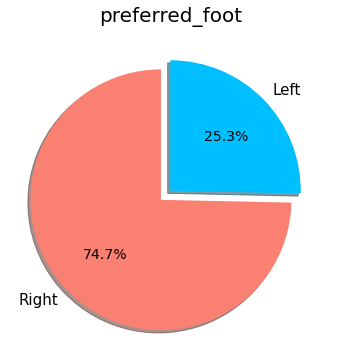

In [ ]:
show_pie_chart(df,['preferred_foot'])

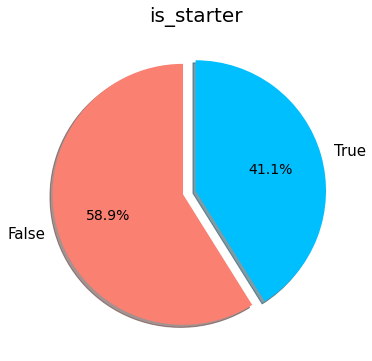

In [ ]:
show_pie_chart(df,['is_starter'])

Here, we can see the distribution to players' positions and clubs. For clear visulizations, only the 25 most common clubs are shown.

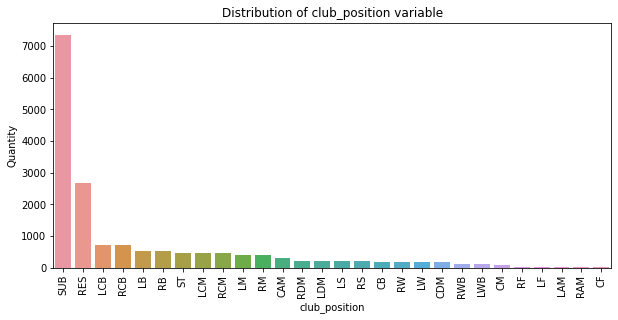

In [ ]:
show_barplot(df, ['club_position'])

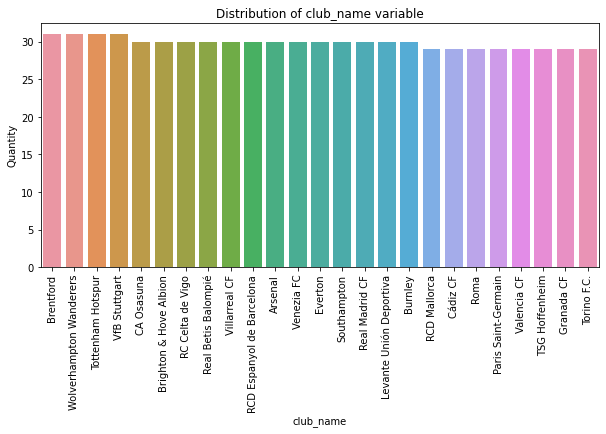

In [ ]:
show_barplot(df,['club_name'],top=25)

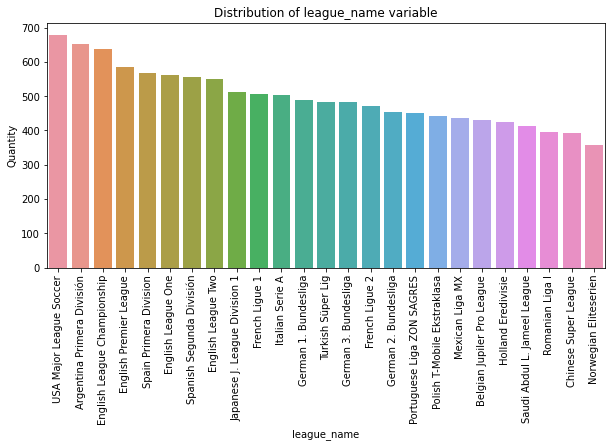

In [ ]:
show_barplot(df,['league_name'],top=25)

Description of numerical variables:

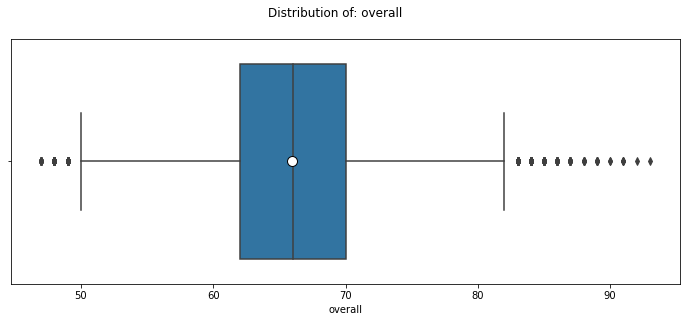

In [ ]:
create_box_plot(df,'overall')


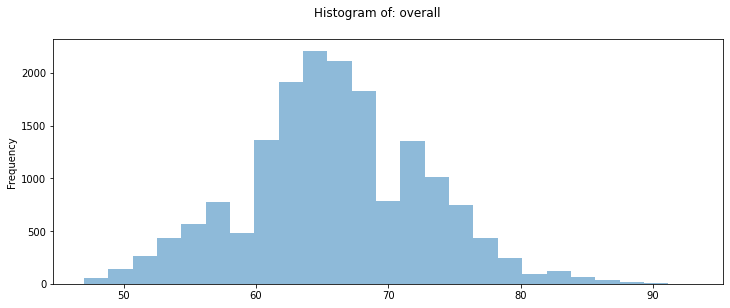

In [ ]:
create_numeric_histogram(df,'overall',25)

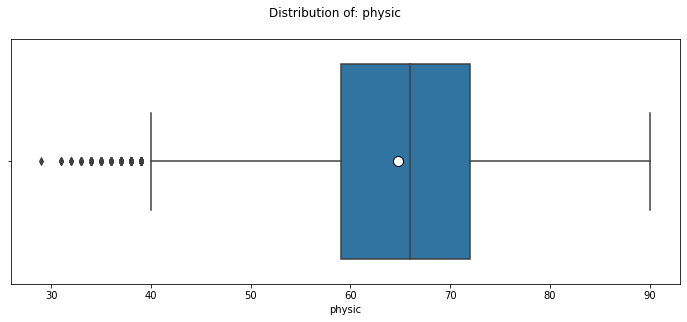

In [ ]:
create_box_plot(df,'physic')

According to the statisic information, the typical values (75% of them) of the wages is 3000-8000, hence it is reasonable to ignore some very extreme values (>50K).

In [ ]:
#compute the ratio of >50K wages
len(df.loc[df['wage_eur'] > 50000])/len(df)

0.032015949337398854

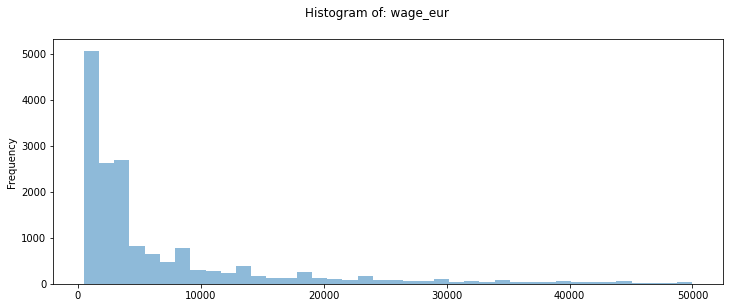

In [ ]:
create_numeric_histogram(df.loc[df['wage_eur'] <= 50000],'wage_eur',bins=40)

In the next graph we can see that the primary age distribution is between the ages of 20 and 30

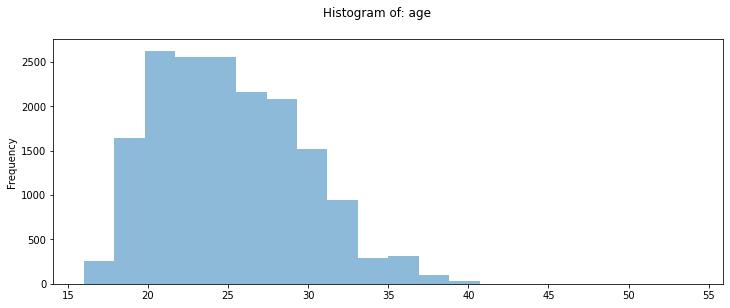

In [ ]:
create_numeric_histogram(df,'age',bins=20)

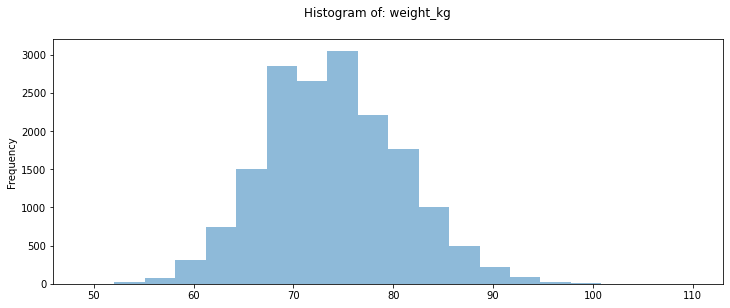

In [ ]:
create_numeric_histogram(df,'weight_kg',20)

## Hypotheses (for future parts)


1. Is increasing the player's weight would increase his physic feature score?<br><br>
2. Does a player's weight gain increase his probability of being a starting player?<br><br>
3. Is there a difference between the **mean** overall score of right-footed players to left-footed players?<br><br>


## Hypothesis Testing

**Is there a difference between the mean overall score of right-footed players to left-footed players?**

### Confidence Intervals

In [ ]:
left_footed_scores = df[df['preferred_foot'] == 'Left']['overall']
right_footed_scores = df[df['preferred_foot'] == 'Right']['overall']

mean_scores_left = left_footed_scores.mean()
mean_scores_right = right_footed_scores.mean()

print(f"Number of players with a left preferred foot of playing is {left_footed_scores.shape[0]} \
\nNumber of players with a right preferred foot of playing is {right_footed_scores.shape[0]}\n")

print(f"The mean overall score of players with a left preferred foot of playing is {mean_scores_left:.2f} \
\nThe mean overall score of players with a right preferred foot of playing is {mean_scores_right:.2f}")

Number of players with a left preferred foot of playing is 4321 
Number of players with a right preferred foot of playing is 12733

The mean overall score of players with a left preferred foot of playing is 66.36 
The mean overall score of players with a right preferred foot of playing is 65.78


In [ ]:
z_0975 = stats.norm.ppf(0.975)

len_left_footed_score = len(left_footed_scores)
se_left_footed_score = left_footed_scores.std()/np.sqrt(len_left_footed_score)
ci_left_footed = [mean_scores_left - z_0975*se_left_footed_score, mean_scores_left + z_0975*se_left_footed_score]

len_right_footed_score = len(right_footed_scores)
se_right_footed_score = right_footed_scores.std()/np.sqrt(len_right_footed_score)
ci_right_footed = [mean_scores_right - z_0975*se_right_footed_score, mean_scores_right + z_0975*se_right_footed_score]

print(f"The confidence interval for the mean overall score of players with a left preferred foot of playing is: {ci_left_footed}")
print(f"The confidence interval for the mean overall score of players with a right preferred foot of playing is: {ci_right_footed}")

The confidence interval for the mean overall score of players with a left preferred foot of playing is: [66.16696520805205, 66.5560155834314]
The confidence interval for the mean overall score of players with a right preferred foot of playing is: [65.66488808134378, 65.90284929398018]


We can assume that the mean overall scores are distributed normally because of the central limit theorem for sample means which says that if you keep drawing larger and larger samples and calculating their means, the sample means form their own normal distribution (the sampling distribution). The normal distribution mean is a good estimation to the original distribution and a variance that estimates the original variance divided by the sample size. The variable n is the number of values that are averaged together.

**The two confidence intervals do not intersect, which means there is a significant difference between the expectations of the two groups.**

### Applying Different Tests

We would like to check whether the mean score of the two categories (right/left footed) is the same. This urges the following statistical test:



$H_{0}: \mu_{1} = \mu_{2} \quad versus \quad H_{1}: \mu_{1} \neq \mu_{2}$,

where $\mu_{1}, \mu_{2}$ be the abovementioned means corresponding to right/left footed players.

Fot the t-test to be practical, the data are assumed to be normal. Let us check this claim using a histogram.

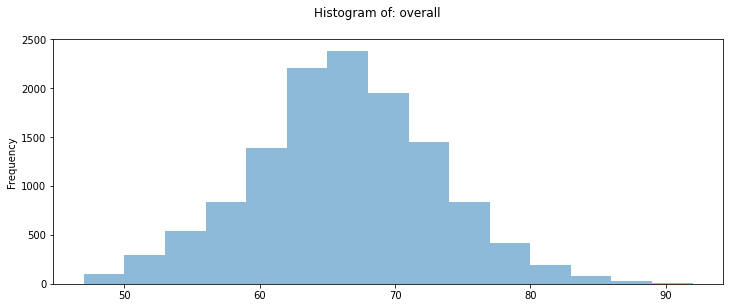

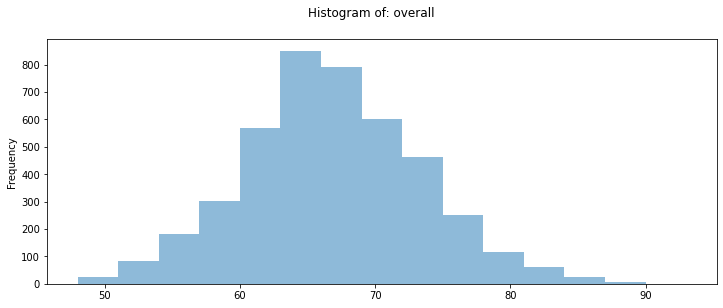

In [ ]:
create_numeric_histogram(df[df['preferred_foot'] == 'Right'],'overall',15)
create_numeric_histogram(df[df['preferred_foot'] == 'Left'],'overall',15)

We conduct an **F-test** with the hypothesis that the two categories have the same variance.

In [ ]:
def sample_var(data):
  '''Computing sample variance'''
  n = len(data)
  return np.var(data)*n/n-1

In [ ]:
def pooled_var(data1,data2):
  '''Computing pooled variance given a set of variances'''
  n1 = len(data1)
  n2 = len(data2)
  if not n1 or not n2:
    return

  V1 = sample_var(data1)
  V2 = sample_var(data2)

  return ((n1-1)*V1+(n2-1)*V2)/(n1+n2-2)

In [ ]:
def f_test(data_x,data_y,alpha):
  '''Comparing two population variances of two sets of observations'''
  V_x = sample_var(data_x)
  V_y = sample_var(data_y)

  f = V_x/V_y
  n = len(data_x)-1
  m = len(data_y)-1

  if V_x > V_y:
    p_value =  2.0*(1 - stats.f.cdf(f, n, m))
  else:
    p_value =  2.0*(1 - stats.f.cdf(1/f, m, n))

  print(f"F statistic = {f}")
  print(f"p-value = {p_value}")
  if p_value < alpha:
      print("Reject H0")
  else:
      print("Accept H0")

In [ ]:
f_test(data_x=left_footed_scores,data_y=right_footed_scores,alpha=0.05)

F statistic = 0.9049302447736995
p-value = 7.058598083209411e-05
Reject H0


We conduct a **T-test** with the hypothesis that the two categories have the same mean.

In [ ]:
def t_test(data_x,data_y,alpha):
  '''Comparing two population means of two sets of observations'''
  n_x = len(data_x)
  n_y = len(data_y)

  E_x = np.mean(data_x)
  E_y = np.mean(data_y)

  V_p = pooled_var(data_x,data_y)
  T = (E_x-E_y)/(np.sqrt(V_p) * np.sqrt(1/n_x+1/n_y)) #assuming equal variances
  #t = ((V_x/n_x+V_y/n_y)**2)/((V_x/n_x)**2/(n_x-1)+(V_y/n_y)**2/(n_y-1)) #non-qual variances
  t = n_x+n_y-2
  p_value = 2.0*stats.t.cdf((-1)*abs(T), t)

  print(f"T statistic = {T}")
  print(f"p-value = {p_value}")
  if p_value < alpha:
      print("Reject H0")
  else:
      print("Accept H0")

In [ ]:
t_test(data_x=left_footed_scores,data_y=right_footed_scores,alpha=0.05)

T statistic = 4.900988137598613
p-value = 9.623170293939043e-07
Reject H0


**Wald Test**: Given two sets of i.i.d random variables, $ \{ X_{i} \}, \{ Y_{j} \} $ with sizes $n,m$, respectively, the size $\alpha$ Wald test rejects $H_{0}$ when $|W|>z_{\alpha/2}$, where
$W = \frac{\bar{X}-\bar{Y}}{\sqrt{s_{X}^{2}/n+s_{Y}^{2}/m}}$.

In [ ]:
def wald_test(data_x,data_y,alpha):
  '''Comparing two means using Wald test'''
  n_x = len(data_x)
  n_y = len(data_y)
  E_x = np.mean(data_x)
  E_y = np.mean(data_y)
  V_x = sample_var(data_x)
  V_y = sample_var(data_y)

  W = (E_x-E_y)/np.sqrt(V_x/n_x + V_y/n_y)

  p_value = 2.0*(1 - stats.norm.cdf(abs(W)))

  print(f"W statistic = {W}")
  print(f"p-value = {p_value}")
  if p_value < alpha:
      print("Reject H0")
  else:
      print("Accept H0")

In [ ]:
wald_test(data_x=left_footed_scores,data_y=right_footed_scores,alpha=0.05)

W statistic = 5.023165414915854
p-value = 5.082673251166625e-07
Reject H0


As we can see, using the F-statistics the claim of equal variances is **rejected**. Despite that fact, t-test with the assumption of equal variances **rejects the claims of equal means**. Wald test rejects this claim with a stronger evidence against $H_{0}$. In all tests, the p-values are critically low and show of good evidence.

Now, we would like to conduct the **likelihood ratio test**. Let $\{ X_{1},\dots,X_{n}\}, \{ Y_{1},\dots,Y_{m}\}$ by the samples of the two categories to be compared with and let $ \{ Z_{1},\dots,Z_{l}\} =  \{ X_{1},\dots,X_{n}, Y_{1},\dots,Y_{m}\}$. Let $\mathcal{L}_{K}(μ,σ^{2}) = \frac{1}{(\sqrt{2\piσ^{2}})^{n}}\prod_{k=1}^{K}e^{\frac{-(X_{k}-\mu)^{2}}{2σ^{2}}}$ be the likelihood function of normal distribution. Taking $σ^{2}=S_{p}$ (the pooled variance) or $σ^{2}=\hat{\sigma}^{2}$ is essentially treating the variance as a constant. We have seen that the maximum likelihood estimator of $\mu$ is
$\hat{\mu}=\bar{X_{K}}$.
Therefore, the test statistic for the likelihood ratio test will be
<br> $λ = 2log{\frac{\mathcal{L}(\hat{θ})}{\mathcal{L}(\hat{θ_{0}})}}=2\log{ \frac{sup_{μ_{X},μ_{Y}}\mathcal{L}_{n}(μ_{X},S_{p}^{2})\mathcal{L}_{m}(μ_{Y},S_{p}^{2})}{sup_{\mu}\mathcal{L}_{n+m}(μ,\hat{\sigma}^{2})}} = 2\log{\frac{\mathcal{L}_{n}(\hat{μ_{X}},S_{p}^{2})\mathcal{L}_{m}(\hat{μ_{Y}},S_{p}^{2})}{\mathcal{L}_{n+m}(\hat{μ},\hat{\sigma}^{2})}}$,
<br>
which is the ratio of the values in the MLE outcomes.

*Note*: The numerator can be computed separately for $\hat{\mu_{X}}$ and $\hat{\mu_{Y}}$, since the samples are i.i.d.

Explicitly, we have that
<br>

$\frac{\mathcal{L}_{n}(\hat{μ_{X}},S_{p}^{2})\mathcal{L}_{m}(\hat{μ_{Y}},S_{p}^{2})}{\mathcal{L}_{n+m}(\hat{μ},\hat{\sigma}^{2})} = \frac{{(\sqrt{2\pi})}^{-n-m}{(\sqrt{{S_{p}}^{2}})}^{-n-m}\exp \left( -\frac{1}{2{S_{p}}^{2}}\left( ∑_{i=1}^{n}(X_{i}-\hat{\mu_{X}})^{2}+∑_{j=1}^{m}(Y_{j}-\hat{\mu_{Y}})^{2}\right) \right)}{{(\sqrt{2\pi})}^{-n-m}{(\sqrt{\hat{\sigma}^{2}})}^{-n-m}\exp \left( -\frac{1}{2{\hat{\sigma}}^{2}}∑_{k=1}^{l}(Z_{k}-\hat{\mu})^{2} \right)}=({\frac{\hat{\sigma}}{S_{p}}})^{n+m}\exp\left(\frac{1}{2{S_{p}}^{2}} \left(∑_{i=1}^{n}(X_{i}-\hat{\mu_{X}})^{2}+∑_{j=1}^{m}(Y_{j}-\hat{\mu_{Y}})^{2}\right) -\frac{1}{2{\hat{\sigma}}^{2}}∑_{k=1}^{l}(Z_{k}-\hat{\mu})^{2}\right)$,

and therefore

$λ = 2(n+m)\log({\frac{\hat{\sigma}}{S_{p}}}) + \left(\frac{1}{{\hat{\sigma}}^{2}}∑_{k=1}^{l}(Z_{k}-\hat{\mu})^{2} - \frac{1}{{S_{p}}^{2}} \left(∑_{i=1}^{n}(X_{i}-\hat{\mu_{X}})^{2}+∑_{j=1}^{m}(Y_{j}-\hat{\mu_{Y}})^{2}\right) \right)$.

We would reject $H_{0}$ if $λ > χ_{1,α}$ for $α=0.05$.


In [ ]:
def negative_normal_log_likelihood(data,var):
  '''Computing the likelihood of normal distribution given observations and parameters'''
  E = np.mean(data)
  diffs = ((data-E)**2)/(2*var)
  res = np.sum(diffs)

  return res

In [ ]:
def likelihood_ratio_test(data_x,data_y,df_data,alpha):
  '''Comparing means using the likelihood ratio test'''

  S_p = pooled_var(data_x, data_y)
  data_all = pd.concat([data_x,data_y])
  V_all = sample_var(data_all)

  lamb = 2*len(data_all)*np.log(np.sqrt(V_all/S_p)) + 2*(negative_normal_log_likelihood(data_all,V_all) -\
            negative_normal_log_likelihood(data_x,S_p) -\
            negative_normal_log_likelihood(data_y,S_p))

  p_value = 1 - stats.chi2.cdf(lamb,df=df_data)
  print(f"lambda statistic = {lamb}")
  print(f"p-value = {p_value}")
  if p_value < alpha:
      print("Reject H0")
  else:
      print("Accept H0")


In [ ]:

likelihood_ratio_test(data_x=left_footed_scores,data_y=right_footed_scores,df_data=1,alpha=0.05)


lambda statistic = 23.468683420608787
p-value = 1.2696370176312755e-06
Reject H0


### Checking Various Sample Sets

In [ ]:
def create_sample(size):
  '''create random sample from original data'''
  new_sample = df_original.sample(n=size)
  left_sample = new_sample[new_sample['preferred_foot'] == 'Left']['overall']
  right_sample = new_sample[new_sample['preferred_foot'] == 'Right']['overall']

  while(left_sample.shape[0] == 0 or right_sample.shape[0] == 0):
    new_sample = df_original.sample(n=size)
    left_sample = new_sample[new_sample['preferred_foot'] == 'Left']['overall']
    right_sample = new_sample[new_sample['preferred_foot'] == 'Right']['overall']

  return [left_sample , right_sample]

def calc_ci(sample):
    '''calculate confidence interval'''
    z_0975 = stats.norm.ppf(0.975)
    size = sample.shape[0]
    mean = sample.mean()
    std = sample.std() if len(sample) != 1 else 0
    left_side = round(mean - z_0975*std/np.sqrt(size),2)
    right_side = round(mean + z_0975*std/np.sqrt(size),2)
    return [left_side, right_side]

In [ ]:
size_of_samples = [30,50,100,500]

for size in size_of_samples:
  samples = create_sample(size)
  ci_left_foot = calc_ci(samples[0])
  ci_right_foot = calc_ci(samples[1])

  print(f"The confidence interval of sample size {size}:\
  \nLeft foot: {ci_left_foot}\
   \nRight foot: {ci_right_foot}\n")


The confidence interval of sample size 30:  
Left foot: [55.79, 73.21]   
Right foot: [64.82, 69.87]

The confidence interval of sample size 50:  
Left foot: [62.11, 68.35]   
Right foot: [64.01, 67.88]

The confidence interval of sample size 100:  
Left foot: [63.26, 69.68]   
Right foot: [64.74, 67.29]

The confidence interval of sample size 500:  
Left foot: [65.63, 67.82]   
Right foot: [65.15, 66.46]



In most of the samples we've got more extensive intervals than we have in the original sample

In [ ]:
for size in size_of_samples:
  samples = create_sample(size)
  print(f'Sample size={size}')
  wald_test(data_x=samples[0],data_y=samples[1],alpha=0.05)
  print(' ')

Sample size=30
W statistic = 1.9811224035837913
p-value = 0.047577548428372474
Reject H0
 
Sample size=50
W statistic = 0.5087489400207609
p-value = 0.6109282135389356
Accept H0
 
Sample size=100
W statistic = 2.062887876040093
p-value = 0.03912328227958639
Reject H0
 
Sample size=500
W statistic = 1.4257991800400072
p-value = 0.15392631767872977
Accept H0
 


In [ ]:
st

In most of the cases we can't reject H0 of small samples. The P-Values in these samples are bigger than we have got in the past.

In [ ]:
#wald test - get p_value only
def wald_test_p_val(data_x,data_y,alpha):
  '''Comparing two means using Wald test'''
  n_x = len(data_x)
  n_y = len(data_y)
  E_x = np.mean(data_x)
  E_y = np.mean(data_y)
  V_x = sample_var(data_x)
  V_y = sample_var(data_y)

  W = (E_x-E_y)/np.sqrt(V_x/n_x + V_y/n_y)

  p_value = 2.0*(1 - stats.norm.cdf(abs(W)))

  return p_value

In [ ]:
all_samples_results = {}

for size in size_of_samples:
  all_samples_results[size] = {'left_ci_len' : [],
             'right_ci_len' : [],
             'mean_in_interval_left' : [],
             'mean_in_interval_right' : [],
             'p_value' : []}
  for i in range(100):
    samples = create_sample(size)

    all_samples_results[size]['p_value'].append(wald_test_p_val(samples[0],samples[1],0.05))

    ci_left_foot = calc_ci(samples[0])
    ci_right_foot = calc_ci(samples[1])

    all_samples_results[size]['left_ci_len'].append(abs(ci_left_foot[0]-ci_left_foot[1]))
    all_samples_results[size]['right_ci_len'].append(abs(ci_right_foot[0]-ci_right_foot[1]))

    all_samples_results[size]['mean_in_interval_left'].append(mean_scores_left>= min(ci_left_foot) and mean_scores_left <= max(ci_left_foot))
    all_samples_results[size]['mean_in_interval_right'].append(mean_scores_right>= min(ci_right_foot) and mean_scores_right <= max(ci_right_foot))



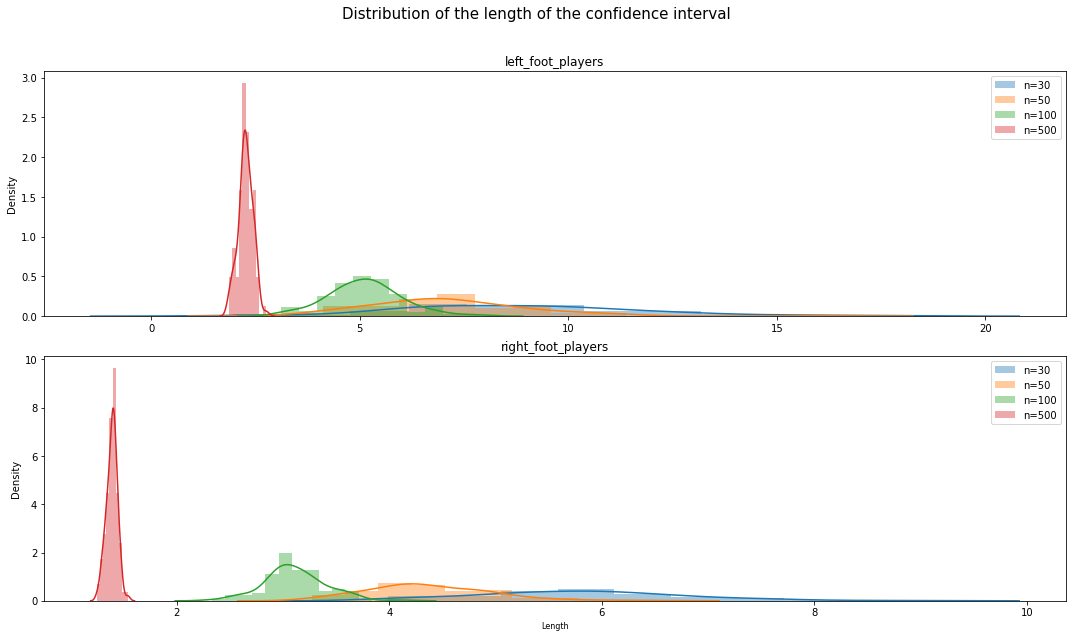

In [ ]:
fig, axs = plt.subplots(ncols=1,nrows=2,figsize = (15,9))
fig.suptitle("Distribution of the length of the confidence interval" ,fontsize=15)
for size in size_of_samples:
    sns.distplot(all_samples_results[size]['left_ci_len'], label=f'n={size}', ax=axs[0])
    sns.distplot(all_samples_results[size]['right_ci_len'], label=f'n={size}',ax=axs[1] )


axs[0].set_title('left_foot_players')
axs[1].set_title('right_foot_players')
plt.xlabel("Length", fontsize=8)
axs[1].legend()
axs[0].legend()
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

As we can see, there is a difference in the distributions of the two sections and a similarity in trend.
More samples will lead more tight CI.


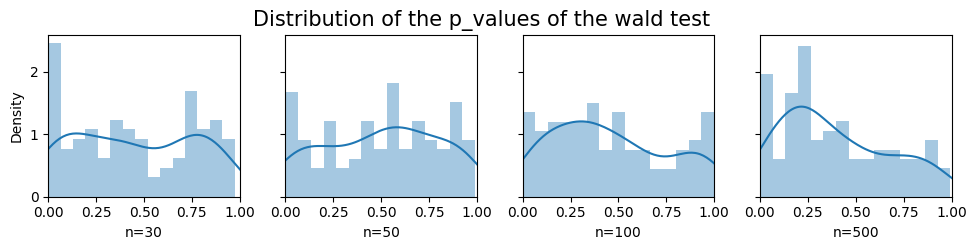

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(10,2.5), dpi=100, sharex=True, sharey=True)
fig.suptitle("Distribution of the p_values of the wald test", fontsize=15)
for i in range(0,4):
  size = size_of_samples[i]
  sns.distplot(all_samples_results[size]['p_value'], axlabel=f'n={size}', ax=axs[i], bins=15)
  axs[i].set_xlim(left=0, right=1)


fig.tight_layout()
fig.subplots_adjust(top=0.88)


plt.show()

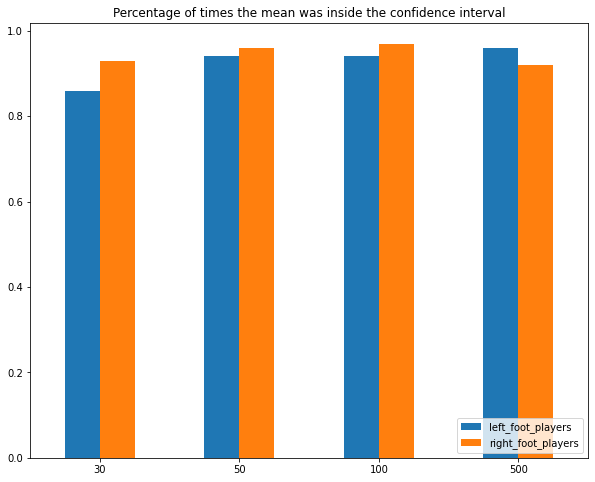

In [ ]:
left = []
right = []
for size in size_of_samples:
  left.append(sum(all_samples_results[size]['mean_in_interval_left'])/100)
  right.append(sum(all_samples_results[size]['mean_in_interval_right'])/100)

df = pd.DataFrame({'left_foot_players': left,
                   'right_foot_players': right}, index=size_of_samples)
ax = df.plot.bar(rot=0, figsize=(10,8))
ax.set_title("Percentage of times the mean was inside the confidence interval")
plt.legend(loc='lower right')


# **Part 2**

## Data Preprocessing

In [ ]:
!pip install RegscorePy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
from RegscorePy import aic
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import scipy.stats as stats
from numpy import linalg as lin
import os
import warnings
from scipy.stats import f
from prettytable import PrettyTable
from numpy.linalg import inv
from scipy.stats import t
from scipy.stats import probplot


warnings.filterwarnings( "ignore" )
IN_COLAB = True
try:
  import google.colab
except:
  IN_COLAB = False

In [ ]:
if IN_COLAB:  #For colab only!
  os.environ['KAGGLE_USERNAME'] = 'matzaroy123'
  os.environ['KAGGLE_KEY'] = 'b292798adb72fc1cabf8ca5df78444e9'
  #!pip install kaggle #install the kaggle library
  !kaggle datasets download --force -d {'stefanoleone992/fifa-22-complete-player-dataset'} -p /data

 93% 101M/109M [00:00<00:00, 179MB/s] 
100% 109M/109M [00:00<00:00, 167MB/s]


In [ ]:
  !unzip -n '/data/fifa-22-complete-player-dataset' -d '/data'
  %rm '/data/fifa-22-complete-player-dataset.zip'
  %cd /data

Archive:  /data/fifa-22-complete-player-dataset.zip
/data


*Data preparation*

In [ ]:
def customized_data():
    #read all csv files
    # for i in range (15, 23): #15,...,22
    #     globals()[f"df_{i}"] = pd.read_csv (f"players_{i}.csv",
    #                                          low_memory=False)
    #     globals()[f"df_{i}"]['year'] = f"20{i}"
    #     print (f"Dataframe containing 20{i} historical statistics was read")

    #read 2022 data file
    df_2022 = pd.read_csv("players_22.csv", low_memory=False)

    #create is_starter attribute
    df_2022['is_starter'] = ~df_2022['club_position'].isin(['SUB','RES'])
    df_2022['preferred_foot_bin'] = df_2022['preferred_foot'].isin(['Right'])
    df_2022['preferred_foot_bin'] =  df_2022['preferred_foot_bin'].astype(int)
    #keep the following columns
    kept_columns = ['sofifa_id','long_name','overall','wage_eur','age','height_cm','weight_kg','league_name','club_name','club_position','physic','is_starter','preferred_foot','preferred_foot_bin']
    df_final = df_2022[kept_columns]
    print (f"Reduced features from dataframe")

    #return the merged data
    return df_final

In [ ]:
df = customized_data()
df.head()

Reduced features from dataframe


,sofifa_id,long_name,overall,wage_eur,age,height_cm,weight_kg,league_name,club_name,club_position,physic,is_starter,preferred_foot,preferred_foot_bin
0,158023,Lionel Andrés Messi Cuccittini,93,320000.0,34,170,72,French Ligue 1,Paris Saint-Germain,RW,65.0,True,Left,0
1,188545,Robert Lewandowski,92,270000.0,32,185,81,German 1. Bundesliga,FC Bayern München,ST,82.0,True,Right,1
2,20801,Cristiano Ronaldo dos Santos Aveiro,91,270000.0,36,187,83,English Premier League,Manchester United,ST,75.0,True,Right,1
3,190871,Neymar da Silva Santos Júnior,91,270000.0,29,175,68,French Ligue 1,Paris Saint-Germain,LW,63.0,True,Right,1
4,192985,Kevin De Bruyne,91,350000.0,30,181,70,English Premier League,Manchester City,RCM,78.0,True,Right,1


## Useful scripts

In [ ]:
def statistics_info(data,cols):
  '''create a statistical summary for numerical variables'''
  for col in cols:
    print(f"\033[1m {col:_^45} \033[0m")
    display(pd.DataFrame(data[col].describe().to_dict(), index=[col]))

In [ ]:
def show_barplot(data,cols,top=None,figsize=(10,4.5)):
    for col in cols:
      """create bar plot for categorical variables"""
      plt.figure(figsize=figsize)
      data_col = data[col].value_counts().reset_index()
      if top is not None:
        data_col = data_col.head(top)
      sns.barplot(data=data_col, x='index', y=col)
      plt.xticks(rotation=90)
      plt.title(f'Distribution of {col} variable')
      plt.xlabel(col)
      plt.ylabel('Quantity')
      plt.show()

In [ ]:
def missing_values_per_column(data):
  '''show number of missing values for each variable'''
  total_number = len(data)
  for col in data:
    null_number = data[col].isnull().sum()
    print(f"{col} | Missing values: {null_number}/{total_number}")

In [ ]:
def show_pie_chart(data, cols):
    """create pie chart to describe binary variable"""
    for col in cols:
      data_col = data[col].value_counts().reset_index()
      plt.figure(figsize=(6,6))
      patches, texts, autotexts = plt.pie(data_col[col], explode= (0.1,0), labels=data_col['index'], autopct='%1.1f%%',
                                          shadow=True, startangle=90, textprops={'fontsize': 14},
                                        colors=['salmon', 'deepskyblue'])
      plt.title(col, fontsize=20)
      texts[0].set_fontsize(15)
      texts[1].set_fontsize(15)

    plt.show()

In [ ]:
def create_discrete_box_plots(data, col_x, col_y, ax=None):
    ax = ax if ax is not None else plt.gca()
    """create box plot to visualize numeric varible"""
    sns.boxplot(data=data, x=col_x, y=col_y, ax=ax)
    ax.set(title=f'Boxplot of {col_x} vs {col_y}')
    ax.set_xlabel(col_x)
    return ax

In [ ]:
def create_numeric_histogram(data, col_name, bins):
  '''create histogram for numeric varible'''
  fig, (ax) = plt.subplots(1, figsize=(12, 4.5))
  data[col_name].plot.hist(alpha=0.5, bins=bins, ax=ax)
  fig.suptitle(f'Histogram of: {col_name}')
  plt.show()

In [ ]:
def create_sample(df,size):
  '''create a random sample from original data'''
  new_sample = df.sample(n=size)

  return new_sample

## Linear Regression

<b>Research question: Do player's age (discrete), weight (continues), height (continues) and preferred foot (discrete) affect the overall score (continues)?</b>

Explanatory variables:


*   age - player age (int discrete)
*   height_cm - player height in CM (int continues)
*   weight_kg - player weight in KG (int continues)
*   preferred_foot - the player's preferred foot (bool - binary)

Response variable:

*   overall - FIFA's total score (int continues)

### Feature Analysis

In [ ]:
df_sub = create_sample(df,200).reset_index().drop(columns=['index'])

**age**


In [ ]:
age_describe = df_sub.age.describe().reset_index()
age_describe.columns = ['parameter', 'value']
age_describe

,parameter,value
0,count,200.000000
1,mean,25.060000
2,std,4.575047
3,min,17.000000
4,25%,22.000000
5,50%,24.000000
6,75%,29.000000
7,max,37.000000


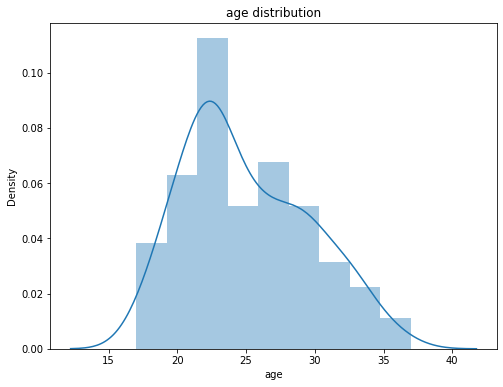

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(df_sub.age)
plt.title("age distribution")
plt.show()

**height_cm**

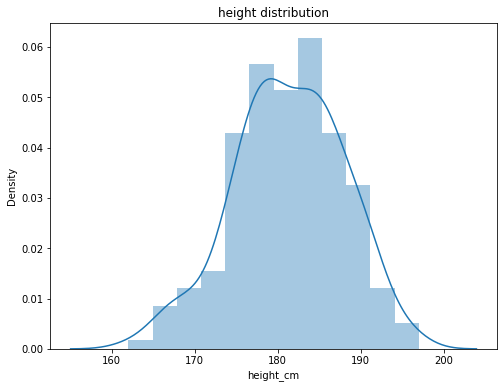

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(df_sub.height_cm, bins=12)
plt.title("height distribution")
plt.show()

**weight_kg**

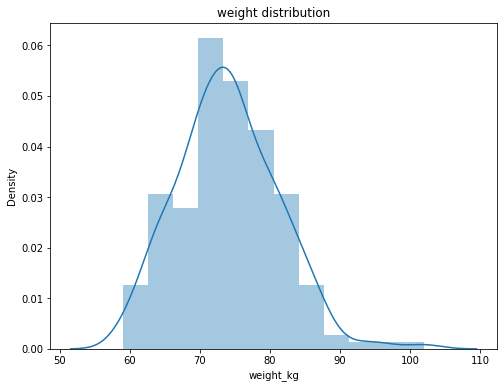

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(df_sub.weight_kg, bins=12)
plt.title("weight distribution")
plt.show()

**preferred_foot**

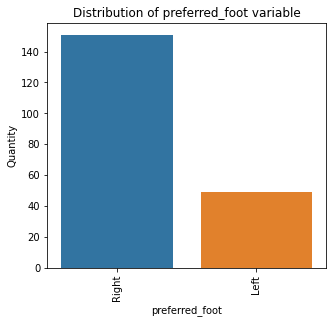

In [ ]:
show_barplot(df_sub, ['preferred_foot'],figsize=(5,4.5))

**overall**

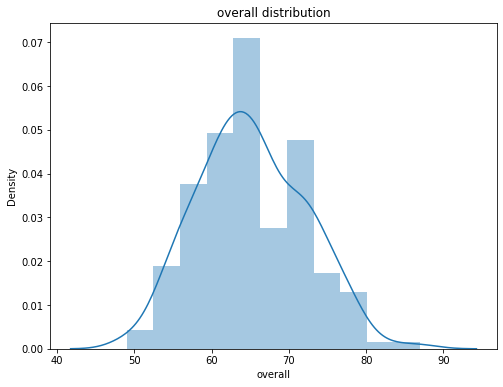

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(df_sub.overall)
plt.title("overall distribution")
plt.show()

In [ ]:
features_list = ['age', 'height_cm', 'weight_kg','preferred_foot', 'overall']

In [ ]:
for feature in features_list:
  print(f"{feature} has {df_sub['age'].isnull().sum()} missing values")

age has 0 missing values
height_cm has 0 missing values
weight_kg has 0 missing values
preferred_foot has 0 missing values
overall has 0 missing values


As we can see, there are no extreme outliers for all our features.<br>

Symmetric - Age: no symmetry was recognized. the minimum age is 17, while the age of retirement is subjective.<br>
&emsp;&emsp;&emsp;&emsp;Height: relatively symmetric.<br>
&emsp;&emsp;&emsp;&emsp;Weight: relatively symmetric.<br>
&emsp;&emsp;&emsp;&emsp;Preferred foot: no symmetry was recognized.20% of the players in the sub data prefer to play with left foot, while 80% prefer right.<br>
&emsp;&emsp;&emsp;&emsp;Overall: relatively symmetric.<br>
Distribution - Age: chi square with small tail to the right.<br>
&emsp;&emsp;&emsp;&emsp;Weight: close to normal distribution.<br>
&emsp;&emsp;&emsp;&emsp;Height: close to normal distribution.<br>
&emsp;&emsp;&emsp;&emsp;Overall: close to normal distribution.

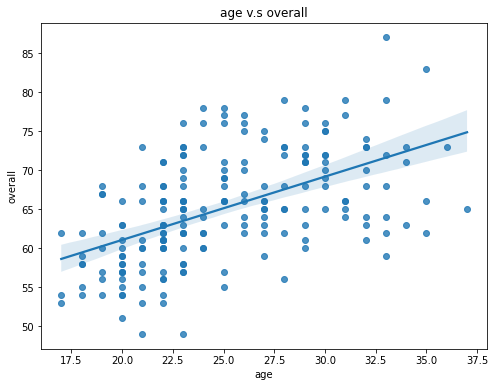

 
0.8117 x + 44.82


In [ ]:
plt.figure(figsize=(8,6))
sns.regplot(y="overall", x="age", data=df_sub)
reg_equation = np.poly1d(np.polyfit(df_sub['age'] ,df_sub['overall'] , 1))
plt.title('age v.s overall')
plt.show()
print(reg_equation)

Age and overall have positive linear relationship

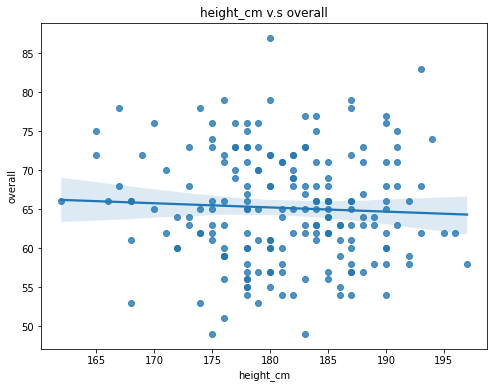

 
-0.05374 x + 74.9


In [ ]:
plt.figure(figsize=(8,6))
sns.regplot(y="overall", x="height_cm", data=df_sub)
reg_equation = np.poly1d(np.polyfit(df_sub['height_cm'] ,df_sub['overall'] , 1))
plt.title('height_cm v.s overall')
plt.show()
print(reg_equation)

Height and overall have positive linear relationship, also in the graph it is hard to see that, but the linear equations indicates that.

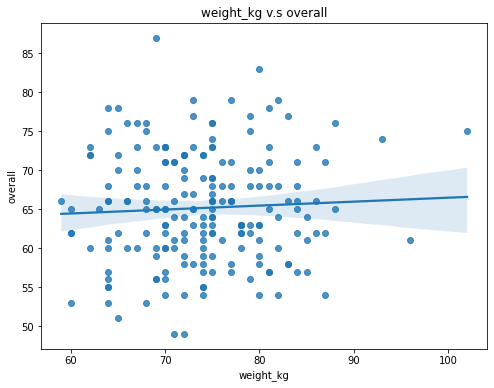

 
0.05059 x + 61.42


In [ ]:
plt.figure(figsize=(8,6))
sns.regplot(y="overall", x="weight_kg", data=df_sub)
reg_equation = np.poly1d(np.polyfit(df_sub['weight_kg'] ,df_sub['overall'] , 1))
plt.title('weight_kg v.s overall')
plt.show()
print(reg_equation)

Weight and overall have positive linear relationship, also in the graph it is hard to see that, but the linear equations indicates that.

We can see that the explanatory variable that has the most influence on the response value overall is age.

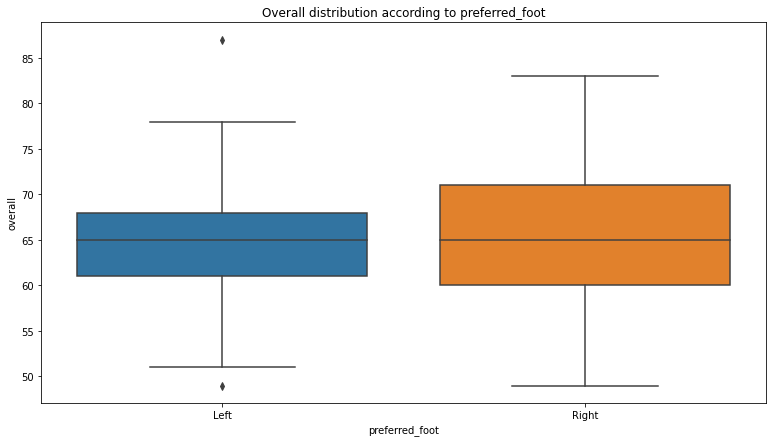

In [ ]:
plt.figure(figsize=(13,7))
sns.boxplot(data=df_sub, x='preferred_foot', y='overall')
plt.title("Overall distribution according to preferred_foot")
plt.show()

### Conducting Linear Regression

In [ ]:
df_sub = pd.get_dummies(df_sub, drop_first=True, dtype=int)
features_list = ['age','height_cm','weight_kg','preferred_foot_Right','overall']

In [ ]:
X = df_sub[features_list[:-1]].to_numpy()
X = np.hstack((np.ones((len(X), 1)),X))
y = df_sub[features_list[-1]].to_numpy()
beta = np.linalg.lstsq(X, y, rcond=None)[0]
beta_0 = beta[0]
beta_hat = beta[1:]

In [ ]:
beta_0, list(map(lambda x: round(x, 4), beta_hat))

(48.79988820519229, [0.8213, -0.01, -0.0386, 0.5875])

In [ ]:
print(features_list[:-1])

['age', 'height_cm', 'weight_kg', 'preferred_foot_Right']


For every explanatory variable $X_{i}$ with a corresponding linear regression coefficient $β_{i}$, increasing $X_{i}$ by one unit (i.e. setting $X_{i}+1$) will increase the overall score by $β_{i}$.<br/>


In [ ]:
y_hat = np.dot(X, beta)
y_mean = np.mean(y_hat)
n, p = X.shape

SSR = ((y_hat - y_mean)**2).sum()
SSE = ((y - y_hat)**2).sum()
SST = SSR + SSE

SSR_df = p - 1
SSE_df = n - p
SST_df = n - 1

MSE = SSE / SSE_df
MSR = SSR / SSR_df
MST = SST/SST_df

F = MSR/MSE
p_value =  1 - f.cdf(F, SSR_df, SSE_df)

In [ ]:
table = [['Source', 'Sum of Squares', 'df', 'MS', 'F'], ['Regression', SSR, SSR_df, MSR, f'F statistic:{F}, p-value: {p_value}'], ['Residuals', SSE, SSE_df, MSE,''],['Total', SST, SST_df, MST ,'']]
tab = PrettyTable(table[0])
tab.add_rows(table[1:])
print(tab)

+------------+-------------------+-----+--------------------+-----------------------------------------------------------------+
|   Source   |   Sum of Squares  |  df |         MS         |                                F                                |
+------------+-------------------+-----+--------------------+-----------------------------------------------------------------+
| Regression | 2776.742492984319 |  4  | 694.1856232460798  | F statistic:19.476765228938632, p-value: 1.6864287744056128e-13 |
| Residuals  | 6950.137507015696 | 195 |  35.6417308052087  |                                                                 |
|   Total    | 9726.880000000016 | 199 | 48.878793969849326 |                                                                 |
+------------+-------------------+-----+--------------------+-----------------------------------------------------------------+


In [ ]:
R_squared = SSR / SST
R_squared_adjusted = 1 - (((n-1) / (n - p)) * (1 - R_squared))
print("R^2: ", R_squared)
print("R_adj^2: ", R_squared_adjusted)

R^2:  0.2854710341840667
R_adj^2:  0.27081402975707325


In [ ]:
C = inv(X.T @ X)
C_ii = [C[i][i] for i in range(5)]
se_i = [np.sqrt(c_j*MSE) for c_j in C_ii]
t_q = t.ppf(0.975, df = n - p)


cc_list = []
for k in range(5):
    cc_k = [beta[k] - t_q * se_i[k], beta[k] +  t_q * se_i[k]]
    cc_list.append(cc_k)
    cc_k = list(map(lambda x: round(x, 4), cc_k))
    print(f"Confidence interval for \u03B2{k}:", cc_k)
    print("")

Confidence interval for β0: [21.2676, 76.3322]

Confidence interval for β1: [0.6301, 1.0125]

Confidence interval for β2: [-0.2037, 0.1837]

Confidence interval for β3: [-0.2222, 0.1449]

Confidence interval for β4: [-1.3533, 2.5283]



In [ ]:
df_dummies = pd.get_dummies(df, drop_first=True, dtype=int)
X_all_data = df_dummies[features_list[:-1]].to_numpy()
X_all_data = np.hstack((np.ones((len(X_all_data), 1)), X_all_data))
y_all_data = df_dummies[features_list[-1]].to_numpy()
beta_all_data = np.linalg.lstsq(X_all_data, y_all_data, rcond=None)[0]

In [ ]:
beta_all_data

array([55.09150828,  0.63957406, -0.06625822,  0.09636904, -0.85628399])

In [ ]:
for k, beta_i in enumerate(beta_all_data):
    cc_k = cc_list[k]
    if beta_i >= cc_k[0] and beta_i <= cc_k[1]:
        print(f"\u03B2{k} is in the Confidence interval")
    else:
        print(f"\u03B2{k} is NOT in the Confidence interval")

β0 is in the Confidence interval
β1 is in the Confidence interval
β2 is in the Confidence interval
β3 is in the Confidence interval
β4 is in the Confidence interval


We will compute confidence intervals for optimal betas using a hypothesis test

$$\begin{array}{l}
{H_0}:\beta _0^*,..,\beta _k^* = 0\\
{H_1}:\exists j:\beta _j^* \ne 0\\
T.S:F = \frac{{MSR}}{{MSE}}\\
R.R:F > {F_{\left( {p,n - p} \right),1 - \frac{\alpha }{2}}}
\end{array}
$$

In [ ]:
y_hat_all_data = np.dot(X_all_data, beta_all_data)
y_mean_all_data = np.mean(y_hat_all_data)
n, p = X_all_data.shape

SSR = ((y_hat_all_data - y_mean_all_data)**2).sum()
SSE = ((y_all_data - y_hat_all_data)**2).sum()
SST = SSR + SSE

SSR_df = p - 1
SSE_df = n - p
SST_df = n - 1

MSE = SSE / SSE_df
MSR = SSR / SSR_df

In [ ]:
F_stat = MSR/MSE
p_val =  1 - f.cdf(F, SSR_df, SSE_df)

print("F statitstic: ", F_stat)
print("P-Value of the F test: ", p_val)

if p_val <= 0.05:
    print("Reject H0")
else:
    print("NOT Reject H0")

F statitstic:  1336.1163013706134
P-Value of the F test:  5.551115123125783e-16
Reject H0


In [ ]:
#calculate for section 10
R_2_all_data = SSR / SSE
R_2_adj_all_data = 1 - ((n-1) / (n - p)) * (1 - R_2_all_data)

Residuals plot

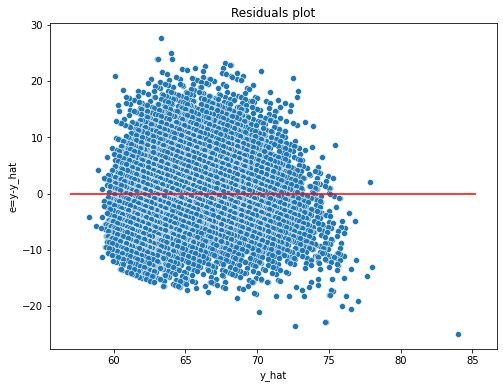

In [ ]:
e = y_all_data - y_hat_all_data

plt.figure(figsize=(8,6))
ax = sns.scatterplot(x=y_hat_all_data, y=e)
xlim = ax.get_xlim()
plt.hlines(0, xlim[0], xlim[1], color='r')
plt.title("Residuals plot")
plt.xlabel("y_hat")
plt.ylabel("e=y-y_hat")

plt.show()

We can see an asymmetry around the x-axis, therefore we infer that the model did not capture the relationships in the data, and the linearity assumption is wrong.
In addition, the width of the errors in the plot is not consistent and therefore we can't assume that the variance is constant.

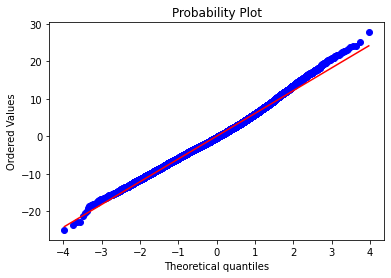

In [ ]:
probplot(e, dist="norm", plot=plt)
plt.show()

we can see from the qq-plot that the normal distribution assumption can be correct

### Evaluation on a different validation set

In [ ]:
df_200 = list(df_sub['sofifa_id'].unique())
df_1000 = df_dummies[~df_dummies['sofifa_id'].isin(df_200)][features_list].sample(n=1000)

In [ ]:
X_1000 = df_1000[features_list[:-1]].to_numpy()
X_1000 = np.hstack((np.ones((len(X_1000), 1)), X_1000))
y_1000 = df_1000[features_list[-1]].to_numpy()

df_1000['y_hat'] = np.dot(X_1000, beta_all_data)

In [ ]:
SSE = sum((df_1000['y_hat'].to_numpy() - y_1000)**2)
MSE = SSE / (1000-p)
C = inv(X_1000[:, 1:].T @ X_1000[:, 1:])
t_q = t.ppf(0.975, df = 1000-2)

cc_inter = t_q * np.sqrt(MSE * ((X_1000[:, 1:] @ C) @ X_1000[:, 1:].T))

In [ ]:
df_1000['y_hat_lower'] = df_1000.apply(lambda row: row.y_hat - t_q*np.sqrt(MSE)*np.sqrt((row[:4] @ C) @ row[:4].T +1) , axis=1)
df_1000['y_hat_upper'] = df_1000.apply(lambda row: row.y_hat + t_q*np.sqrt(MSE)*np.sqrt((row[:4] @ C) @ row[:4].T +1) , axis=1)

df_1000['is_in_cc'] = (df_1000['overall'] <= df_1000['y_hat_upper']) & (df_1000['overall'] >= df_1000['y_hat_lower'])

In [ ]:
freq_is_in_cc = (df_1000['is_in_cc'].sum() / df_1000.shape[0]) * 100
print(f"Percent of the samples that in the PI: {freq_is_in_cc}%")

Percent of the samples that in the PI: 94.8%


### First order interactions

In [ ]:
features_list = ['age','height_cm','weight_kg','preferred_foot_Right','overall']
df_dummies['Z12'] = df_dummies['age'] * df_dummies['height_cm']
df_dummies['Z13'] = df_dummies['age'] * df_dummies['weight_kg']
df_dummies['Z14'] = df_dummies['age'] * df_dummies['preferred_foot_Right']
df_dummies['Z23'] = df_dummies['height_cm'] * df_dummies['weight_kg']
df_dummies['Z24'] = df_dummies['height_cm'] * df_dummies['preferred_foot_Right']
df_dummies['Z34'] = df_dummies['weight_kg'] * df_dummies['preferred_foot_Right']

In [ ]:
X_new = (df_dummies[features_list[:-1] + ['Z12', 'Z13','Z14','Z23','Z24','Z34']]).to_numpy()
X_new = np.hstack((np.ones((len(X_new), 1)), X_new))
y_new = df_dummies[features_list[-1]].to_numpy()
beta_new = np.linalg.lstsq(X_new, y_new, rcond=None)[0]
beta_0_new = beta_new[0]
beta_hat_new = beta_new[1:]

In [ ]:
y_hat_new = np.dot(X_new, beta_new)
y_mean_new = np.mean(y_hat_new)
n, p = X_new.shape

SSR_new= ((y_hat_new - y_mean_new)**2).sum()
SSE_new = ((y_new - y_hat_new)**2).sum()
SST_new = SSR_new + SSE_new

R_squared_new = SSR_new / SST_new
R_squared_adjusted_new = 1 - (((n-1) / (n - p)) * (1 - R_squared_new))

if R_2_adj_all_data > R_squared_adjusted_new:
    print("Model with less parameters has larger R^2_adj, and therefore this model is better")
else:
    print("Model with less parameters has smaller R^2_adj, and therefore this model is worse")

y_all_data = list(map(float, y_all_data))
y_hat_all_data = list(map(float, y_hat_all_data))
y_new = list(map(float, y_new))
y_hat_new = list(map(float, y_hat_new))

if aic.aic(y_all_data, y_hat_all_data,4) < aic.aic(y_new, y_hat_new,10):
    print("Model with less parameters has smaller AIC, and therefore this model is worse")
else:
    print("Model with less parameters has larger AIC, and therefore this model is better")


Model with less parameters has larger R^2_adj, and therefore this model is better
Model with less parameters has larger AIC, and therefore this model is better


## Logistic Regression

<b> Research question: Do player's age, weight and height have an effect on its club position?</b>

Explanatory variables:
* age - player age (integer - continous)
* height_cm - player height in CM (integer - continuous)
* weight_kg - player weight in KG (integer - continuous)

Response variable:
* is_starter - True if the player is in the starting lineup (all club positions except reserve or substitute) (bool - binary)

In [ ]:
df_sub = create_sample(df,200).reset_index().drop(columns=['index'])

### Feature Analysis

Variables *age, height, weight* variables were plotted in the previous part.

Distribution of *is_starter*:

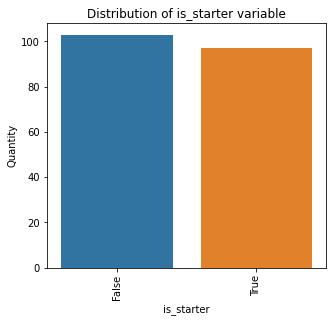

In [ ]:
show_barplot(df_sub, ['is_starter'],figsize=(5,4.5))

In [ ]:
print(f"is_starter has {df_sub['is_starter'].isnull().sum()} missing values")

is_starter has 0 missing values


All the variables were analysed in part A but *'is_starter'*.

In [ ]:
print(f"is_starter has {df_sub['is_starter'].isnull().sum()} missing values")

is_starter has 0 missing values


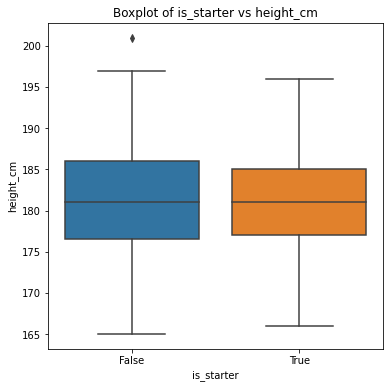

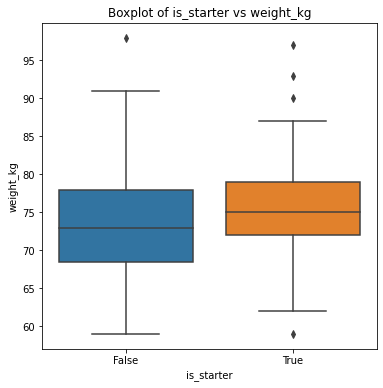

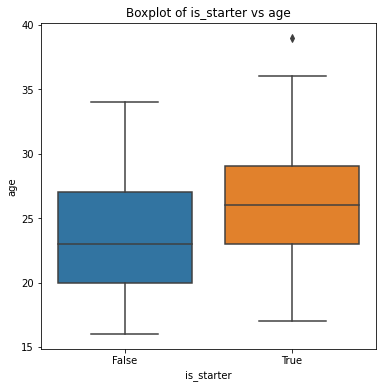

In [ ]:
for y in ['height_cm','weight_kg','age']:
  plt.figure(figsize=(6,6))
  create_discrete_box_plots(data= df_sub, col_x='is_starter', col_y=y)
  plt.show()

The plots show that age has a significant impact on the position of the player. As for height and weight, distributions look pretty much the same.

In [ ]:
#logistic regression
def logistic_regression(X,y):
  reg = LogisticRegression(penalty='none', fit_intercept=False).fit(X,y)
  return reg.coef_[0]

In [ ]:
#finding the logistic regression coefficients for the subsampling
X = df_sub[['height_cm','weight_kg','age']].to_numpy()
X = np.concatenate([np.ones((X.shape[0],1)),X],axis=1)
y = df_sub[['is_starter']].to_numpy()

beta_logreg = logistic_regression(X,y)
print("Logistic regression coefficients:\n", beta_logreg)

Logistic regression coefficients:
 [-5.21178957e+00 -3.86367976e-03  3.39405451e-02  1.32852554e-01]


For every explanatory variable $X_{i}$ with a corresponding logisitic regression coefficient $β_{i}$, increasing $X_{i}$ by one unit (i.e. setting $X_{i}+1$) will increase the odds ratio by a factor of $e^{β_{i}}$.

In [ ]:
#estimating of the variance of the LR estimator
pi = lambda x: np.exp(x)/(1+np.exp(x))
y_pi = pi(X@(beta_logreg.T))
inv_var = X.T@np.diag(y_pi*(1-y_pi))@X
Var_hat = lin.inv(inv_var)


#computing confidence intervals
alpha = 0.05
z_bound = stats.norm.ppf(1-alpha/2)
se_beta_ii = np.sqrt(np.diag(Var_hat))
left_sides = beta_logreg - z_bound*se_beta_ii
right_sides = beta_logreg + z_bound*se_beta_ii
print('Confidence intervals of \u03B2 are:')
for i in range(X.shape[1]):
  print(f'\u03B2{i}: [{left_sides[i]},{right_sides[i]}]')

Confidence intervals of β are:
β0: [-14.828537448181628,4.404958306837163]
β1: [-0.07353266555858942,0.06580530603347273]
β2: [-0.03336744231642242,0.10124853257479233]
β3: [0.06523165764171082,0.20047345027354932]


In [ ]:
#finding the logistic regression coefficients for the whole sampling
X_full = df[['height_cm','weight_kg','age']].to_numpy()
X_full = np.concatenate([np.ones((X_full.shape[0],1)),X_full],axis=1)
y_full = df[['is_starter']].to_numpy()

beta_logreg_full = logistic_regression(X_full,y_full)
print("Logistic regression coefficients :\n", beta_logreg_full)

Logistic regression coefficients :
 [-0.00035042 -0.02533702  0.01679855  0.11597182]


In [ ]:
for k, beta_star in enumerate(beta_logreg_full):
    if beta_star >= left_sides[k] and  beta_star <= right_sides[k]:
        print(f"\u03B2{k} is in the Confidence interval")
    else:
        print(f"\u03B2{k} is NOT in the Confidence interval")

β0 is in the Confidence interval
β1 is in the Confidence interval
β2 is in the Confidence interval
β3 is in the Confidence interval


### First Order Interactions

In [ ]:
#Adding interactions to the model
if X.shape[1] != 3+1:
  print("Error")
X_int = np.concatenate([X, np.expand_dims(X[:,1]*X[:,2],1), np.expand_dims(X[:,1]*X[:,3],1), np.expand_dims(X[:,2]*X[:,3],1)],axis=1)

In [ ]:
#finding the logistic regression coefficients for the interactions model
beta_logreg_int = logistic_regression(X_int,y)
print("Logistic regression coefficients:\n", beta_logreg_int)

Logistic regression coefficients:
 [-2.61887134e-03  4.98290697e-02 -1.76121632e-01 -8.20469079e-02
  3.91276921e-05 -2.20165990e-03  8.32827481e-03]


Let $β^{*}_{1}, \dots, β^{*}_{k}$ be the resulting coefficients of the original model, and let $β^{*}_{k+1}, \dots, β^{*}_{m}$ be the additional resulting coefficients from the interaction model. To check which model is better we have the following likelihood ratio test

$H_{0}: β^{*}_{k+1}= \dots = β^{*}_{m} = 0$ versus $H_{1}:∃n>k:  β^{*}_{n} \ne 0$.

$T.S: λ:= 2\log{(\frac{L(\hat{θ})}{L(\hat{θ_{0}})})} $ ,where the numerator and denominator are the corresponding likelihood functions.

$R.R: λ < χ^{2}_{m-k,α}$ for $α=0.05$.


In [ ]:
def log_likelihood_log_reg(data,y,beta):
    sum_log_likelihood = 0

    for i in range(len(data)):
        pi_hat_i = pi(data[i]@beta.T)
        sum_log_likelihood += y[i,0] * np.log(pi_hat_i/(1-pi_hat_i)) + np.log(1- pi_hat_i)

    return sum_log_likelihood

In [ ]:
def likelihood_ratio_test_models(data0,y0,beta0,data,y,beta,alpha,df_data):
  '''Comparing models using the likelihood ratio test'''

  lamb = 2*(log_likelihood_log_reg(data,y,beta) - log_likelihood_log_reg(data0,y0,beta0))

  p_value = 1 - stats.chi2.cdf(lamb,df=df_data)
  print(f"lambda statistic = {lamb}")
  print(f"p-value = {p_value}")
  if p_value < alpha:
      print("Reject H0 -  Prefer logistic regression model with interactions")
  else:
      print("Accept H0 - Prefer logistic regression model without interactions")

In [ ]:
print("By the likelihood ratio test:")
#comparing models using the likelihood ratio test
df_data = X_int.shape[1] - X.shape[1]
alpha=0.05
likelihood_ratio_test_models(X,y,beta_logreg,X_int,y,beta_logreg_int,alpha,df_data)

By the likelihood ratio test:
lambda statistic = 1.7429610976410288
p-value = 0.6274251738416337
Accept H0 - Prefer logistic regression model without interactions


In [ ]:
#model scoring methods
def AIC_log_reg(X,y,beta):
   ll = log_likelihood_log_reg(X,y,beta)
   S = X.shape[1]-1

   return (ll-S)

def BIC_log_reg(X,y,beta):
   ll = log_likelihood_log_reg(X,y,beta)
   S = X.shape[1]-1
   n = X.shape[0]

   return (ll-S*np.log(n)/2)

In [ ]:
#comparing models using scoring
def model_score_test_AIC_log_reg(X1,y1,beta1,X2,y2,beta2):
  score_diff = AIC_log_reg(X1,y1,beta1) - AIC_log_reg(X2,y2,beta2)
  if score_diff>0:
    return 1
  elif score_diff<0:
    return 2

  return 0

def model_score_test_BIC_log_reg(X1,y1,beta1,X2,y2,beta2):
  score_diff = BIC_log_reg(X1,y1,beta1) - BIC_log_reg(X2,y2,beta2)
  if score_diff>0:
    return 1
  elif score_diff<0:
    return 2

  return 0

In [ ]:
print("By AIC score:")
winning_model_aic = model_score_test_AIC_log_reg(X,y,beta_logreg,X_int,y,beta_logreg_int)
if winning_model_aic ==1:
  print("Prefer logistic regression model without interactions")
elif winning_model_aic ==2:
  print("Prefer logistic regression model with interactions")
else:
  print("Models score the same")


print("By BIC score:")
winning_model_aic = model_score_test_BIC_log_reg(X,y,beta_logreg,X_int,y,beta_logreg_int)
if winning_model_aic ==1:
  print("Prefer logistic regression model without interactions")
elif winning_model_aic ==2:
  print("Prefer logistic regression model with interactions")
else:
  print("Models score the same")

By AIC score:
Prefer logistic regression model without interactions
By BIC score:
Prefer logistic regression model without interactions


We will choose the best model using Forward/Backward Stepwise Regression among any model that allows first order interactions

In [ ]:
#adding first order interactions to the model
import itertools
df_sub_int = df_sub.drop(columns=['sofifa_id','long_name','league_name','club_name','club_position','preferred_foot','is_starter'])
all_pairs_features = list(itertools.combinations(df_sub_int.columns.to_list(), 2))
for f1, f2 in all_pairs_features:
    df_sub_int[f'{f1}_{f2}'] = df_sub_int[f1].astype(float) * df_sub_int[f2].astype(float)
df_sub_int['is_starter'] = df_sub['is_starter']
df_sub_int = df_sub_int.dropna() #remove nulls

In [ ]:
def model_selection_forward(data, features, target, metric = "aic"):
  '''Model selection using Forward Stepwise Regression with AIC metric'''
  #prepare target and auxiliary data structures
  y = data[[target]].to_numpy()
  chosen = [] #variables which are kept
  best_score = -np.Inf
  temp_score = 0

  #add variables in a greedy manner
  while set(chosen) != set(features):
    candidates = list(set(features)-set(chosen))
    best_candidate = None
    #choose a subset of the variables
    for feature in candidates:
      #check the model score after adding this variable
      X = data[chosen+[feature]].to_numpy()
      X = np.concatenate([np.ones((X.shape[0],1)),X],axis=1)
      beta = LogisticRegression(penalty='none', fit_intercept=False).fit(X,y).coef_[0]

      if metric == "aic":
        temp_score = AIC_log_reg(X,y,beta)
      elif metric == "bic":
        temp_score = BIC_log_reg(X,y,beta)

      if temp_score > best_score:
        best_candidate = feature
        best_score = temp_score

    #if there isn't an improvment in score of all the left possibilities, halt
    if best_candidate is None:
      break
    else:
      chosen.append(best_candidate)

  return [chosen, best_score]

In [ ]:
def model_selection_backward(data, features, target, metric = "aic"):
  '''Model selection using Backward Stepwise Regression with AIC metric'''
  #prepare target and auxiliary data structures
  y = data[[target]].to_numpy()
  chosen = [] #variables which are omitted
  best_score = -np.Inf
  temp_score = 0

  #add variables in a greedy manner
  while set(chosen) != set(features):
    candidates = list(set(features)-set(chosen))
    worst_candidate = None
    #choose a subset of the variables
    for feature in candidates:
      #check the model score after reducing this variable
      X = data[[f for f in candidates if f != feature]].to_numpy()
      X = np.concatenate([np.ones((X.shape[0],1)),X],axis=1)
      beta = LogisticRegression(penalty='none', fit_intercept=False).fit(X,y).coef_[0]

      if metric == "aic":
        temp_score = AIC_log_reg(X,y,beta)
      elif metric == "bic":
        temp_score = BIC_log_reg(X,y,beta)

      if temp_score > best_score:
        worst_candidate = feature
        best_score = temp_score

    #if there isn't an improvment in score of all the left possibilities, halt
    if worst_candidate is None:
      break
    else:
      chosen.append(worst_candidate)

  return [list(set(features)-set(chosen)), best_score]

Comparing between Forward/Backward Stepwise Regression (AIC)

In [ ]:
data= df_sub_int
target='is_starter'
features=df_sub_int.columns.to_list()
features.remove(target)

print("Forward [<features selected>, <score>]")
print(model_selection_forward(data,features,target,"aic"))
print("Backward [<features selected>, <score>]")
#NOTE: it takes some time
print(model_selection_backward(data,features,target,"aic"))

Forward [<features selected>, <score>]
[['overall', 'age_physic'], -103.29167745048056]
Backward [<features selected>, <score>]
[['age_height_cm', 'wage_eur_weight_kg', 'age_weight_kg', 'age_physic', 'overall_weight_kg', 'overall_wage_eur', 'height_cm_weight_kg'], -106.54255146502196]


As we can see, the two methods (Forward/Backward) provide different results.

Comparing between Forward/Backward Stepwise Regression (BIC)

In [ ]:
print("Forward [<features selected>, <score>]")
print(model_selection_forward(data,features,target,"bic"))
print("Backward [<features selected>, <score>]")
#NOTE: it takes some time
print(model_selection_backward(data,features,target,"bic"))

Forward [<features selected>, <score>]
[['overall'], -105.44125388557441]
Backward [<features selected>, <score>]
[['height_cm_weight_kg', 'age_height_cm', 'age_weight_kg', 'overall_weight_kg'], -113.28244267771683]


We got different results for AIC, and BIC, though the features chosen by the two in each method were contained one in the other. This demonstrates the "punishing" nature of BIC metric for complex models.

# **Part 3**

## Data Preprocessing

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import scipy.stats as stats
from numpy import linalg as lin
import os
import warnings
from scipy.stats import t
from scipy.stats import probplot

In [ ]:
warnings.filterwarnings( "ignore" )
IN_COLAB = True
try:
  import google.colab
except:
  IN_COLAB = False

In [ ]:
if IN_COLAB:  #For colab only!
  os.environ['KAGGLE_USERNAME'] = 'matzaroy123'
  os.environ['KAGGLE_KEY'] = 'b292798adb72fc1cabf8ca5df78444e9'
  #!pip install kaggle #install the kaggle library
  !kaggle datasets download --force -d {'stefanoleone992/fifa-22-complete-player-dataset'} -p /data

 94% 102M/109M [00:00<00:00, 273MB/s] 
100% 109M/109M [00:00<00:00, 235MB/s]


In [ ]:
  !unzip -n '/data/fifa-22-complete-player-dataset' -d '/data'
  %rm '/data/fifa-22-complete-player-dataset.zip'
  %cd /data

Archive:  /data/fifa-22-complete-player-dataset.zip
/data


*Data preparation*

In [ ]:
def customized_data():
    #read all csv files
    # for i in range (15, 23): #15,...,22
    #     globals()[f"df_{i}"] = pd.read_csv (f"players_{i}.csv",
    #                                          low_memory=False)
    #     globals()[f"df_{i}"]['year'] = f"20{i}"
    #     print (f"Dataframe containing 20{i} historical statistics was read")

    #read 2022 data file
    df_2022 = pd.read_csv("players_22.csv", low_memory=False)

    #create is_starter attribute
    df_2022['is_starter'] = ~df_2022['club_position'].isin(['SUB','RES'])
    df_2022['preferred_foot_bin'] = df_2022['preferred_foot'].isin(['Right'])
    df_2022['preferred_foot_bin'] =  df_2022['preferred_foot_bin'].astype(int)
    #keep the following columns
    kept_columns = ['sofifa_id','long_name','overall','wage_eur','age','height_cm','weight_kg','league_name','club_name','club_position','physic','is_starter','preferred_foot','preferred_foot_bin']
    df_final = df_2022[kept_columns]
    df_final = df_final.dropna()
    print (f"Reduced features from dataframe")

    #return the merged data
    return df_final

In [ ]:
df = customized_data()
df.head()

Reduced features from dataframe


,sofifa_id,long_name,overall,wage_eur,age,height_cm,weight_kg,league_name,club_name,club_position,physic,is_starter,preferred_foot,preferred_foot_bin
0,158023,Lionel Andrés Messi Cuccittini,93,320000.0,34,170,72,French Ligue 1,Paris Saint-Germain,RW,65.0,True,Left,0
1,188545,Robert Lewandowski,92,270000.0,32,185,81,German 1. Bundesliga,FC Bayern München,ST,82.0,True,Right,1
2,20801,Cristiano Ronaldo dos Santos Aveiro,91,270000.0,36,187,83,English Premier League,Manchester United,ST,75.0,True,Right,1
3,190871,Neymar da Silva Santos Júnior,91,270000.0,29,175,68,French Ligue 1,Paris Saint-Germain,LW,63.0,True,Right,1
4,192985,Kevin De Bruyne,91,350000.0,30,181,70,English Premier League,Manchester City,RCM,78.0,True,Right,1


## Useful scripts

In [ ]:
def statistics_info(data,cols):
  '''create a statistical summary for numerical variables'''
  for col in cols:
    print(f"\033[1m {col:_^45} \033[0m")
    display(pd.DataFrame(data[col].describe().to_dict(), index=[col]))

In [ ]:
def show_barplot(data,cols,top=None,figsize=(10,4.5)):
    for col in cols:
      """create bar plot for categorical variables"""
      plt.figure(figsize=figsize)
      data_col = data[col].value_counts().reset_index()
      if top is not None:
        data_col = data_col.head(top)
      sns.barplot(data=data_col, x='index', y=col)
      plt.xticks(rotation=90)
      plt.title(f'Distribution of {col} variable')
      plt.xlabel(col)
      plt.ylabel('Quantity')
      plt.show()

In [ ]:
def missing_values_per_column(data):
  '''show number of missing values for each variable'''
  total_number = len(data)
  for col in data:
    null_number = data[col].isnull().sum()
    print(f"{col} | Missing values: {null_number}/{total_number}")

In [ ]:
def show_pie_chart(data, cols):
    """create pie chart to describe binary variable"""
    for col in cols:
      data_col = data[col].value_counts().reset_index()
      plt.figure(figsize=(6,6))
      patches, texts, autotexts = plt.pie(data_col[col], explode= (0.1,0), labels=data_col['index'], autopct='%1.1f%%',
                                          shadow=True, startangle=90, textprops={'fontsize': 14},
                                        colors=['salmon', 'deepskyblue'])
      plt.title(col, fontsize=20)
      texts[0].set_fontsize(15)
      texts[1].set_fontsize(15)

    plt.show()

In [ ]:
def create_discrete_box_plots(data, col_x, col_y, ax=None):
    ax = ax if ax is not None else plt.gca()
    """create box plot to visualize numeric varible"""
    sns.boxplot(data=data, x=col_x, y=col_y, ax=ax)
    ax.set(title=f'Boxplot of {col_x} vs {col_y}')
    ax.set_xlabel(col_x)
    return ax

In [ ]:
def create_numeric_histogram(data, col_name, bins):
  '''create histogram for numeric varible'''
  fig, (ax) = plt.subplots(1, figsize=(12, 4.5))
  data[col_name].plot.hist(alpha=0.5, bins=bins, ax=ax)
  fig.suptitle(f'Histogram of: {col_name}')
  plt.show()

In [ ]:
def create_sample(df,size):
  '''create a random sample from original data'''
  new_sample = df.sample(n=size)

  return new_sample

## Linear Regression

We will use the same research question and subsample as in part 3.

<b>Research question: Do player's age (discrete), weight (continuous), height (continuous) and preferred foot (discrete) affect the overall score (continuous)?</b>

Explanatory variables:


*   age - player age (int discrete)
*   height_cm - player height in CM (int continues)
*   weight_kg - player weight in KG (int continues)
*   preferred_foot_bin - the player's preferred foot (bool - binary)

Response variable:

*   overall - FIFA's total score (int continues)

In [ ]:
df_sub_all = create_sample(df,300).reset_index().drop(columns=['index'])
df_sub = df_sub_all[:200]
df_test = df_sub_all[200:]

In [ ]:
features_list = ['age', 'height_cm', 'weight_kg','preferred_foot_bin', 'overall']

In [ ]:
def lin_reg_solve(X,y):
  '''find linear regression oefficients'''
  return np.linalg.lstsq(X, y, rcond=None)[0]

In [ ]:
X_sub = df_sub[features_list[:-1]].to_numpy()
X_sub = np.hstack((np.ones((len(X_sub), 1)),X_sub))
y_sub = df_sub[features_list[-1]].to_numpy()
beta_sub = lin_reg_solve(X_sub, y_sub)

 Confidence intervals using normal approximation (covariance matrix)

In [ ]:
#finding confidence intervals for beta
n, p = X_sub.shape
z_0025 = stats.norm.ppf(0.975)

y_pred_sub = np.dot(X_sub, beta_sub)
#(unbiased) estimate for the variance of the noise using MSE
var_eps = ((y_pred_sub - y_sub)**2).sum()/(n-p)

C = lin.inv(X_sub.T @ X_sub)
C_ii = [C[i][i] for i in range(p)]
se_i = [np.sqrt(c_j*var_eps) for c_j in C_ii]

cc_list_normal_cov = []
for k in range(5):
    cc_k = [beta_sub[k] - z_0025 * se_i[k], beta_sub[k] +  z_0025 * se_i[k]]
    cc_list_normal_cov.append(cc_k)
    cc_k = list(map(lambda x: round(x, 4), cc_k))
    print(f"Confidence interval for \u03B2{k}:", cc_k)
    print("")

Confidence interval for β0: [19.3611, 74.3015]

Confidence interval for β1: [0.4001, 0.7576]

Confidence interval for β2: [-0.2071, 0.1787]

Confidence interval for β3: [-0.0796, 0.2879]

Confidence interval for β4: [-3.2875, 0.4834]



Confidence intervals using normal approximation (bootstrap)

In [ ]:
def se_boot_lin_reg(X,y,B=400):
  '''compute approximated variance from 1D array using bootstrap'''
  n, p = X.shape
  T = np.zeros(shape=(B,p))
  for b in range(B):
    i_b = np.random.choice(n, n)
    T[b,:] = lin_reg_solve(X[i_b,:],y[i_b])
  boot_variances = np.mean(T**2,axis=0) - (np.mean(T,axis=0))**2

  return [np.sqrt(boot_variances),T]

In [ ]:
# computing bootstrap variance and distrubution
se_i, boot_samples = se_boot_lin_reg(X_sub,y_sub)

In [ ]:
cc_list_normal_boot = []
for k in range(p):
    cc_k = [beta_sub[k] - z_0025 * se_i[k], beta_sub[k] +  z_0025 * se_i[k]]
    cc_list_normal_boot.append(cc_k)
    cc_k = list(map(lambda x: round(x, 4), cc_k))
    print(f"Confidence interval for \u03B2{k}:", cc_k)
    print("")

Confidence interval for β0: [17.5453, 76.1172]

Confidence interval for β1: [0.4364, 0.7212]

Confidence interval for β2: [-0.2248, 0.1964]

Confidence interval for β3: [-0.0825, 0.2908]

Confidence interval for β4: [-3.2522, 0.4481]



Pivotal confidence intervals

In [ ]:
# utilizing bootstrap distribution in order to determine quantiles for the CI
def boot_quantiles(T,k,alpha=0.025,B=400):
  '''compute empirical quantiles of bootstrap samples'''
  T_k = T[:,k]
  T_k.sort(axis=0)
  t_0025 = np.quantile(T_k,0.025)
  t_9975 = np.quantile(T_k,0.975)

  return [t_0025,t_9975]

In [ ]:
n, p = X_sub.shape
cc_list_pivot = []
for k in range(p):
    t_l, t_r = boot_quantiles(boot_samples,k)
    cc_k = [2*beta_sub[k]-t_r,2*beta_sub[k]-t_l]
    cc_list_pivot.append(cc_k)
    cc_k = list(map(lambda x: round(x, 4), cc_k))
    print(f"Confidence interval for \u03B2{k}:", cc_k)
    print("")

Confidence interval for β0: [20.2461, 75.6346]

Confidence interval for β1: [0.4337, 0.724]

Confidence interval for β2: [-0.2185, 0.1805]

Confidence interval for β3: [-0.0868, 0.2966]

Confidence interval for β4: [-3.163, 0.3859]



Confidence intervals using bootstrap quantiles

In [ ]:
n, p = X_sub.shape
cc_list_quan = []
for k in range(p):
    t_l, t_r = boot_quantiles(boot_samples,k)
    cc_k = [t_l,t_r]
    cc_list_quan.append(cc_k)
    cc_k = list(map(lambda x: round(x, 4), cc_k))
    print(f"Confidence interval for \u03B2{k}:", cc_k)
    print("")

Confidence interval for β0: [18.0279, 73.4165]

Confidence interval for β1: [0.4337, 0.724]

Confidence interval for β2: [-0.2089, 0.1901]

Confidence interval for β3: [-0.0883, 0.2951]

Confidence interval for β4: [-3.19, 0.359]



Comparison between CIs lengths and checking whether the approx. coeeficients of the whole sample are contained in the CIs

In [ ]:
X = df[features_list[:-1]].to_numpy()
X = np.hstack((np.ones((len(X), 1)),X))
y = df[features_list[-1]].to_numpy()
beta = np.linalg.lstsq(X, y, rcond=None)[0]

In [ ]:
print(f'Method: Normal approximation using covariance matrix')
Lengths_1 = [round(b[1]-b[0],4) for b in cc_list_normal_cov]
print(f'Lengths:{Lengths_1}')
for k in range(p):
  cc_k = list(map(lambda x: round(x, 4), cc_k))
  l, r = cc_list_normal_cov[k]
  if l <= beta[k] and beta[k] <= r:
     print(f"\u03B2{k} is contained in the CI")
  else:
    print(f"\u03B2{k} is NOT contained in the CI")

Method: Normal approximation using covariance matrix
Lengths:[54.9404, 0.3575, 0.3858, 0.3675, 3.7709]
β0 is contained in the CI
β1 is contained in the CI
β2 is contained in the CI
β3 is contained in the CI
β4 is contained in the CI


In [ ]:
print(f'Method: Normal approximation with approx. variance using bootstrap')
Lengths_2 = [round(b[1]-b[0],4) for b in cc_list_normal_boot]
print(f'Lengths:{Lengths_2}')
for k in range(p):
  l, r = cc_list_normal_boot[k]
  if l <= beta[k] and beta[k] <= r:
     print(f"\u03B2{k} is contained in the CI")
  else:
    print(f"\u03B2{k} is NOT contained in the CI")

Method: Normal approximation with approx. variance using bootstrap
Lengths:[58.5719, 0.2848, 0.4212, 0.3733, 3.7004]
β0 is contained in the CI
β1 is contained in the CI
β2 is contained in the CI
β3 is contained in the CI
β4 is contained in the CI


In [ ]:
print(f'Method: Pivotal CI')
Lengths_3 = [round(b[1]-b[0],4) for b in cc_list_pivot]
print(f'Lengths:{Lengths_3}')
for k in range(p):
  l, r = cc_list_pivot[k]
  if l <= beta[k] and beta[k] <= r:
     print(f"\u03B2{k} is contained in the CI")
  else:
    print(f"\u03B2{k} is NOT contained in the CI")

Method: Pivotal CI
Lengths:[55.3886, 0.2903, 0.399, 0.3834, 3.5489]
β0 is contained in the CI
β1 is contained in the CI
β2 is contained in the CI
β3 is contained in the CI
β4 is contained in the CI


In [ ]:
print(f'Method: Bootstrap quantiles')
Lengths_4 = [round(b[1]-b[0],4) for b in cc_list_quan]
print(f'Lengths:{Lengths_4}')
for k in range(p):
  l, r = cc_list_quan[k]
  if l <= beta[k] and beta[k] <= r:
     print(f"\u03B2{k} is contained in the CI")
  else:
    print(f"\u03B2{k} is NOT contained in the CI")

Method: Bootstrap quantiles
Lengths:[55.3886, 0.2903, 0.399, 0.3834, 3.5489]
β0 is contained in the CI
β1 is contained in the CI
β2 is contained in the CI
β3 is contained in the CI
β4 is contained in the CI


In [ ]:
lengths_dict = [Lengths_1,Lengths_2,Lengths_3,Lengths_4]
b_i_dict = {}
for i in range(5):
  b_i_dict[f'b{i}'] = [list_of_values[i] for list_of_values in lengths_dict]

Comparison lengths of CIs between methods:

In [ ]:

cc_lens_df = pd.DataFrame(b_i_dict, index=['Covariance matrix', 'Normal Approx. w/ bootstrap', 'Pivot', 'Quantiles'])
cc_lens_df

,b0,b1,b2,b3,b4
Covariance matrix,54.9404,0.3575,0.3858,0.3675,3.7709
Normal Approx. w/ bootstrap,58.5719,0.2848,0.4212,0.3733,3.7004
Pivot,55.3886,0.2903,0.3990,0.3834,3.5489
Quantiles,55.3886,0.2903,0.3990,0.3834,3.5489


In [ ]:
melted_lens_df = pd.melt(cc_lens_df.reset_index(), id_vars=['index'], value_vars=['b0', 'b1', 'b2', 'b3', 'b4'])

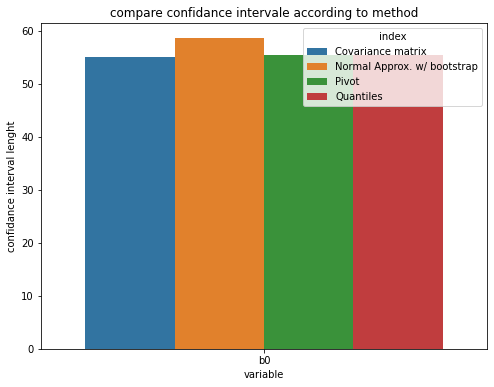

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data=melted_lens_df[melted_lens_df['variable'] == 'b0'], x='variable', y='value', hue='index')
plt.title('compare confidance intervale according to method')
plt.ylabel('confidance interval lenght')
plt.show()

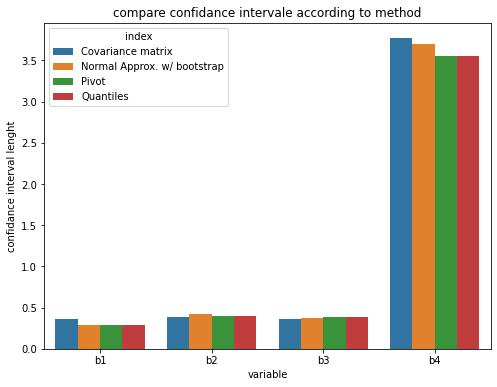

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data=melted_lens_df[melted_lens_df['variable'] != 'b0'], x='variable', y='value', hue='index')
plt.title('compare confidance intervale according to method')
plt.ylabel('confidance interval lenght')
plt.show()

We now work with a newly sampled set of 100 entries

In [ ]:
#predict y_new from X_new
X_new = df_test[features_list[:-1]].to_numpy()
X_new = np.hstack((np.ones((len(X_new), 1)),X_new))
y_new = df_test[features_list[-1]].to_numpy()
y_new_pred = X_new @ beta_sub.T

Approximating $\hat{s.e.}(E(Y_{new}|X_{new})) \approx s.e.(\hat{Y}_{new})$ using bootstrap.

In [ ]:
def se_boot_new_points(X,y,X_new,B=400):
  '''compute approximated s.e. of new values using bootstrap'''
  n, p = X.shape
  n_new = X_new.shape[0]
  T = np.zeros(shape=(B,n_new))

  for b in range(B):
    i_b = np.random.choice(n, n)
    #compute coefficients on the bootstrap sample
    beta_b = lin_reg_solve(X[i_b,:],y[i_b])
    T[b,:] = X_new @ beta_b.T # ~E[Y_new | X_new]

  #take only the precdictions on the test sample
  boot_variances = np.mean(T**2,axis=0) - (np.mean(T,axis=0))**2

  return [np.sqrt(boot_variances),T]

Denoting $\hat{η} = \hat{E}(Y_{new}|X_{new})$ and the bootstrap samples as ${\hat{\eta}}^{*(b)}_{n}, (b=1,\dots,B)$
Using quantiles CI with bootstrap, the confidence interval of level $\alpha$ is
$[{\hat{\eta}}^{*(b)}_{\alpha/2}, {\hat{\eta}}^{*(b)}_{1-\alpha/2} ]$.

In [ ]:
_, boot_samples_E_y_new = se_boot_new_points(X_sub,y_sub,X_new)
print('Confidence interval of E(Y_new | X_new):')
print('[')

c_in = 0 # maintaining counter for percentage of y's in the CI
for i,y_i in enumerate(y_new):
    t_l, t_r = boot_quantiles(boot_samples_E_y_new,i)
    if t_l <= y_i and y_i <= t_r:
      c_in += 1
    print(f'[{t_l},{t_r}]')
print(']')

Confidence interval of E(Y_new | X_new):
[
[61.77687571698593,64.10256896840929]
[63.99414303632891,66.3092912111693]
[67.42997104333197,70.49576673622607]
[66.02977071878082,69.261132037465]
[62.93079859133611,66.51331946526797]
[67.97237184833408,71.12355071937007]
[62.45533293473624,65.44380598282102]
[61.76673900670062,64.75034380223008]
[63.97834239015286,68.91374893994164]
[60.50940415770678,63.278922522480556]
[58.724343651244546,61.84633381621402]
[60.671605530019136,64.04268671375303]
[60.22940452019591,63.83095103246326]
[64.00375545340442,65.97295850033892]
[64.6261518397458,67.06134290756435]
[66.05888278107493,68.28457670479818]
[65.92003290332775,68.53661848576203]
[66.84890510010493,70.49351999526075]
[62.159254435943545,64.16175738671663]
[61.68641547589239,68.73223975191519]
[60.967732583072355,63.35755498694821]
[59.92320945164035,62.47119774769034]
[69.07081842336514,74.3177997353654]
[63.507053970589084,65.43196918576892]
[61.32495925208947,64.6302328780486]
[60.948

In [ ]:
#checking percentage of y_new that lie in the CI
N = len(y_new)
print(f'Percentage of y_new that lie in the CI: {c_in/N*100.0}%')
if c_in/N >= 0.95:
  print('At least 95% of predictions')

Percentage of y_new that lie in the CI: 23.0%


The percantage of CI's that contain the real value is not close to 95.

As seen in recitation, in order to compute $Var(Y_{new})$, it is possible to find separately $Var(\hat{Y}_{new})$ and $Var(\sigma_{new})$ (the noise from the new samples). Therefore, we can use the result from previous section for the former and approximate the latter using bootstrap, and finally add them up to get the desired variance. Then we can compute CI as usual.

## Hypothesis Testing

<b> Research question: Do right-footed players have higher overall score than left-footed playes?</b>

Explanatory variables:
* preferred_foot_bin - True if the player is right-footed (bool - binary).

Response variable:
* overall - FIFA's total score (integer - continuous).

In [ ]:
#subsample of size 200 of all data
df_sub2 = create_sample(df,200).reset_index().drop(columns=['index'])
features_list = ['preferred_foot_bin', 'overall']
df2 = df_sub2[features_list]
df_right = df2[df2['preferred_foot_bin']==1]
df_left = df2[df2['preferred_foot_bin']==0]

Let us estimate the means of right-footed and left-footed players' overall score, $\mu_{1}, \mu_{2}$, respectively, and their difference.

In [ ]:
r_mean = df_right.mean()['overall']
l_mean = df_left.mean()['overall']
delta_mean = r_mean-l_mean
print( f'Right-footed mean overall score:{r_mean}')
print( f'Left-footed mean overall score:{l_mean}')
print(f'Estimation of \u03B4:{delta_mean}')

Right-footed mean overall score:65.03289473684211
Left-footed mean overall score:67.0625
Estimation of δ:-2.0296052631578902


Checking normality of the data:

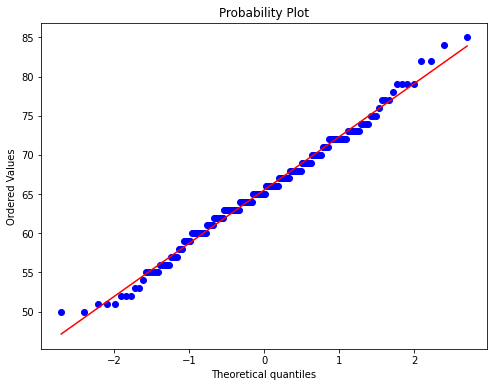

In [ ]:
e = df2['overall']
plt.figure(figsize=(8,6))
probplot(e, dist="norm", plot=plt)
plt.show()

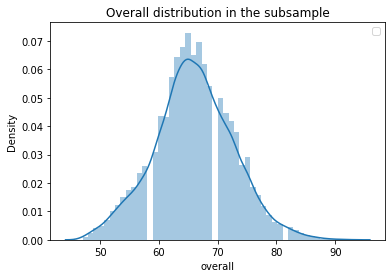

In [ ]:
plt.title("Overall distribution in the subsample")
sns.distplot(df.overall)
plt.legend()
plt.show()

Hence, it is a reasonable assumption that data have normal distribution.

These estimators are MLEs, as seen in previous lectures; for some random varible $X$, its sample mean $\bar{X}_{n}$ is an MLE if we assume normal distribution, i.e. that the data is from $\mathcal{N}(\mu_{i},\sigma_{i}^{2})$ for some constant $σ_{i}^{2}$. For the same reason, the estimator of the difference between categories, say $(\overline{X-Y})_{n} = \bar{X}_{n} - \bar{Y}_{n}$ is also an MLE of normal distribution of the difference between the values with expected value of $\delta:= \mu_{1}-\mu_{2}$.

The standard error of an MLE $\hat{θ}$ is given by $se ≈ \sqrt{\frac{1}{I_{n}(\hat{θ})}}$, where $I_{n}(\hat{θ})$ is the Fischer information function evaluated in the estimator.
We've seen in Homework2 Q2 that the log likelihood function is

$l(\mu;\sigma,X) = \log(\frac{1}{\sigma \sqrt{2\pi}})-\frac{(X-μ)^{2}}{2σ^{2}}$.

Therefore the score function is

$s(X;\mu) = l'(\mu) = \frac{(X-\mu)}{σ^{2}}$.

Hence, the Fischer information will be

$I(\mu) = -E[s'(\mu)] = \frac{1}{σ^{2}} \implies I_{n}(\mu) = \frac{n}{σ^{2}}$,

and we can estimate the standard error by

$\hat{se} = \frac{\hat{σ}}{\sqrt{n}} \approx  \sqrt{\frac{1}{I_{n}(μ)}} $

Then a normal-approximated CI will be $(\hat{\mu_{1}} - \hat{\mu_{2}}) \pm z_{\alpha/2}\frac{\hat{σ}}{\sqrt{n}}$, where $\hat{σ}$ is the sample variance of $\hat{\mu_{1}} - \hat{\mu_{2}}$.

In our case, since $X,Y$ (the two categories) are independent, we can treat the variances of each of the MLEs separately:

$\hat{σ}= Var(\hat{\mu_{1}} - \hat{\mu_{2}})=Var(\hat{\mu_{1}}) + Var(\hat{\mu_{2}})= \hat{σ_{X}}/n_{X}+\hat{σ_{Y}}/n_{Y}$, where $n_{X},n_{Y}$ are the sizes of samples of $X,Y$.

In [ ]:
z_0025 = stats.norm.ppf(0.975)
n_r = len(df_right)
n_l = len(df_left)
n= n_r +n_l
r_std = df_right.std()['overall']*n_r/(n_r-1)
l_std = df_left.std()['overall']*n_l/(n_l-1)
se_delta = (r_std/n_r+l_std/n_l)/np.sqrt(n)
lower = delta_mean-z_0025*se_delta
upper = delta_mean+z_0025*se_delta
print(f'Confidence interval of \u03B4:[{lower},{upper}]')

Confidence interval of δ:[-2.0510760933231595,-2.008134432992621]


In [ ]:
df2_all = df[features_list]
df_right_all = df2_all[df2_all['preferred_foot_bin']==1]
df_left_all = df2_all[df2_all['preferred_foot_bin']==0]
delta_mean_all = df_right_all.mean()['overall'] - df_left_all.mean()['overall']
print(f'Estimated \u03B4: {delta_mean_all}')
if delta_mean_all >= delta_mean-z_0025*se_delta and delta_mean_all <= delta_mean+z_0025*se_delta:
  print('Estimated \u03B4 over all data is in the condfidence interval')
else:
  print('Estimated \u03B4 over all data is NOT in the condfidence interval')

Estimated δ: -0.5776217080797466
Estimated δ over all data is NOT in the condfidence interval


Let $\mu_{1}, \mu_{2}$ be the abovementioned means corresponding to right/left footed players.

**One-sided Wald Test**:

Consider the following test:

$H_{0}: \mu_{1} = \mu_{2} \quad versus \quad H_{1}: \mu_{1} > \mu_{2}$,

Given two sets of i.i.d random variables, $ \{ X_{i} \}, \{ Y_{j} \} $ with sizes $n,m$, respectively, the size $\alpha$ Wald test rejects $H_{0}$ when $W>z_{\alpha}$, where
$W = \frac{\bar{X}-\bar{Y}}{\sqrt{s_{X}^{2}/n+s_{Y}^{2}/m}}$.

In [ ]:
def one_sided_wald_test(data_x,data_y,alpha):
  '''Comparing means using Wald test (mean_x > mean_y)'''
  n_x = len(data_x)
  n_y = len(data_y)
  E_x = np.mean(data_x)
  E_y = np.mean(data_y)
  V_x = np.var(data_x)
  V_y = np.var(data_y)

  W = (E_x-E_y)/np.sqrt(V_x/n_x + V_y/n_y)

  p_value = 1 - stats.norm.cdf(W)

  print(f"W statistic = {W}")
  print(f"p-value = {p_value}")
  if p_value < alpha:
      print("Reject H0")
  else:
      print("Not reject H0")

In [ ]:
one_sided_wald_test(df_right['overall'].to_numpy(),df_left['overall'].to_numpy(),0.05)

W statistic = -2.193067325741024
p-value = 0.9858487356343876
Not reject H0


**Permutations Test**:
We can verify the research question in terms of stochastic order $\prec$. Given random variables $X,Y$, with means $\mu_{1}, \mu_{2}$, respectively, consider the following test:

$H_{0}: X = Y \quad versus \quad H_{1}: Y \prec X$.

The size $\alpha$ permutation test (testing means and using resampling) rejects $H_{0}$ when $\frac{1}{B}\sum_{b=1}^{B} I\{ T_{0} \ge T_{b} \}$, where $T_{0}$ is the actual means difference, and $T_{b}$ is the means difference of the $b$th bootsrap sample.




In [ ]:
def means_permutation_test(data,real_mean_diff,category,B=400):
  '''conduct premutation test using means of 2 groups'''
  #B=400
  sum_all_bigger_delta = 0
  for b in range(B):
      #sample_i = df2.sample(n=200, replace=True)
      sample_i = data.sample(n=200, replace=True)
      r_overall = sample_i[sample_i[category] == True].overall.mean()
      l_overall = sample_i[sample_i[category] == False].overall.mean()

      delta_i = r_overall - l_overall

      if delta_i >= real_mean_diff:
          sum_all_bigger_delta += 1

  p_value = (1/B)*sum_all_bigger_delta
  print('p_value:',round(p_value,4))
  if p_value < 0.05:
      print("Reject H0")
  else:
      print("Not reject H0")

In [ ]:
means_permutation_test(df2,delta_mean,'preferred_foot_bin')

p_value: 0.455
Not reject H0


Let us estimate the medians of right-footed and left-footed players' overall score, $m_{1}, m_{2}$, respectively, and their difference.

In [ ]:
r_median = df_right.median()['overall']
l_median = df_left.median()['overall']
delta_median = r_median-l_median
print( f'Right-footed median overall score:{r_median}')
print( f'Left-footed median overall score:{l_median}')
print(f'Estimation of \u03B4:{delta_median}')

Right-footed median overall score:65.0
Left-footed median overall score:68.0
Estimation of δ:-3.0


Under the assumption that our data are approximately normally-distributed, the mean and the median are equal. Therefore, the median can be treated as an MLE. However, in the next sections we will assume no statistical model, and will use bootstrap in order to find properties of $\delta$.

In [ ]:
def boot_medians_diff(data,category,B=400):
  '''approximate median difference using bootstrap'''
  T = np.empty(B)
  delta_mean_list = []
  for b in range(B):
      sample_i = data.sample(n=200, replace=True)
      r_overall = sample_i[sample_i[category] == True].overall.median()
      l_overall = sample_i[sample_i[category] == False].overall.median()

      T[b] = r_overall - l_overall

  return [np.mean(T), T]

In [ ]:
_,boot_mean_diff_samples = boot_medians_diff(df2,'preferred_foot_bin')
sorted_delta_meidan_list = sorted(boot_mean_diff_samples)
lower = np.quantile(sorted_delta_meidan_list, 0.025)
upper = np.quantile(sorted_delta_meidan_list, 0.975)
CI = [lower, upper]
print(f'Confidence interval of \u03B4:{CI}')

Confidence interval of δ:[-5.0, -1.0]


In [ ]:
df2_all = df[features_list]
df_right_all = df2_all[df2_all['preferred_foot_bin']==1]
df_left_all = df2_all[df2_all['preferred_foot_bin']==0]
delta_median_all = df_right_all.median()['overall'] - df_left_all.median()['overall']
print(f'Estimated \u03B4: {delta_median_all}')
if delta_median_all >= lower and delta_mean_all <= upper:
  print('Estimated \u03B4 over all data is in the condfidence interval')
else:
  print('Estimated \u03B4 over all data is NOT in the condfidence interval')

Estimated δ: 0.0
Estimated δ over all data is NOT in the condfidence interval


Consider the following test:

$H_{0}: m_{1} = m_{2} \quad versus \quad H_{1}: m_{1} > m_{2}$,

where $m_{1}, m_{2}$ be the abovementioned medians corresponding to right/left footed players. We'll do a similar process as in Section 3d.

In [ ]:
def medians_permutation_test(data,real_median_diff,category,B=400):
  '''conduct premutation test using medians of 2 groups'''
  sum_all_bigger_delta = 0
  for b in range(B):
      sample_i = data.sample(n=200, replace=True)
      r_overall = sample_i[sample_i[category] == True].overall.median()
      l_overall = sample_i[sample_i[category] == False].overall.median()

      delta_i = r_overall - l_overall

      if delta_i >= real_median_diff:
          sum_all_bigger_delta += 1

  p_value = (1/B)*sum_all_bigger_delta
  print('p_value:',round(p_value,4))
  if p_value < 0.05:
      print("Reject H0")
  else:
      print("Not reject H0")

In [ ]:
medians_permutation_test(df2,delta_median,'preferred_foot_bin')

p_value: 0.585
Not reject H0


In case there are equal values in our data, we will take the average of their locations as their ranks

In [ ]:
def degrees_ties(data):
  '''compute ranks in case of tie values in the data'''
  data2 = data.sort_values(by=['overall'])
  data2['new_rank'] = np.nan
  new_ranks = np.arange(len(data))
  counts = data2.value_counts('overall')
  for c in counts.index:
    locations = np.where(data2.overall == c)[0]
    data2.loc[data.overall == c,'new_rank'] = np.mean(locations)

  return data2, counts.values

In [ ]:
df2_reranked, t_r = degrees_ties(df2)
sum_ranks = lambda d, category: d[d[category]==True]['new_rank'].sum()
S1 =sum_ranks(df2_reranked,'preferred_foot_bin')
S1

14318.0

Under normality assumption of $δ$, we can use Wald or the t-test.
Under assumption of no certain statistical model to $δ$, we cannot use the t-test because it is meant to test expectations, not medians. We also can't use Wald test, unless we prove that the estimator is asymptotically normal.



In [ ]:
def sod_permutation_test(data,category,sum_of_degrees_1,B=400):
  '''conduct premutation test using some of degrees of a certain group'''
  sum_all_bigger = 0
  for b in range(B):
      sample_i = data.sample(n=200, replace=True).reset_index()
      sample_reranked, _ = degrees_ties(sample_i)
      S1_i = sum_ranks(sample_reranked,category)

      #without ties:
      #sample_i = sample_i.sort_values(by='overall').reset_index()
      #sample_i = sample_i[sample_i[category] == True]
      #ranks = list(map(lambda x: x+1, list(sample_i.index)))
      #S1_i = sum(ranks)

      if S1_i >= S1:
          sum_all_bigger += 1

  p_value = (1/B)*sum_all_bigger
  print('p_value:',round(p_value,4))
  if p_value < 0.05:
      print("Reject H0")
  else:
      print("Not reject H0")


In [ ]:
sod_permutation_test(df2,'preferred_foot_bin',S1)

p_value: 0.4375
Not reject H0


Since we have that both categories have $>30$ samples we can treat the distribution of the sum of degrees of the categories as normal.

Consider the following test:

$H_{0}: X = Y \quad versus \quad H_{1}: Y \prec X $,

under normality assumption, we will reject $H_{0}$ with level of significance $\alpha$ when $T= \frac{S_{1}-E[S_{1}]}{\sqrt{Var(S_{1})}} \ge z_{\alpha}$, where $S_{1}$ is the sum of degrees of the first category. We've seen in recitation that under $H_{0}$ it holds

$E[S_{1}] = \frac{n(n+m+1)}{2}$

$Var[S_{1}] = \frac{mn(n+m+1)}{12}$.

Also, as we've seen, the variance is changed by the tie values as a function of the size of the tie values groups.


In [ ]:
def wilcoxon_statistic_normal_test(sum_of_degrees_1,n,m,alpha=0.05):
  '''Wilxocson test using normal approximation'''
  E_s1 = n*(n+m+1)/2
  V_s1 = m*n*(n+m+1)/12
  T = (sum_of_degrees_1-E_s1)/np.sqrt(V_s1)
  p_value = 1 - stats.norm.cdf(T)

  #add bias caused by tie values
  V_s1 -= n*m/(12*(n+m)*(n+m-1))*np.sum(t_r*(t_r**2-1))


  print(f"T statistic = {T}")
  print(f"p-value = {p_value}")
  if p_value < alpha:
      print("Reject H0")
  else:
      print("Not reject H0")

In [ ]:
n = len(df_right)
m = len(df_left)
wilcoxon_statistic_normal_test(S1,n,m)

T statistic = -2.7404109282207867
p-value = 0.9969318794172674
Not reject H0


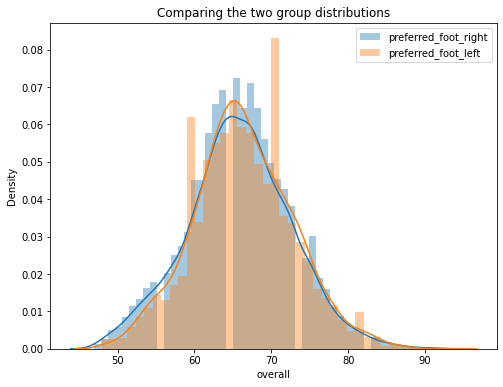

In [ ]:
plt.figure(figsize=(8,6))
plt.title("Comparing the two group distributions")
sns.distplot(df[df['preferred_foot_bin'] == 1].overall, label='preferred_foot_right')
sns.distplot(df[df['preferred_foot_bin'] == 0].overall, label='preferred_foot_left')
plt.legend()
plt.show()

According to the histograms above, we can see a significant overlap between the two distributions. Therefore we cannot reject the hypothesis that right-footed players have higher overall scores than left-footed players. We don't see a significant difference between the two distributions. Therefore, it does make sense with the results we got in questions 3-5 that we can't reject H0.

# **Part 4**


## Data Preprocessing

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import os
import warnings
import scipy.stats as st
from numpy.linalg import inv
from scipy.stats import t

In [ ]:
warnings.filterwarnings( "ignore" )
IN_COLAB = True
try:
  import google.colab
except:
  IN_COLAB = False

In [ ]:
if IN_COLAB:  #For colab only!
  os.environ['KAGGLE_USERNAME'] = 'matzaroy123'
  os.environ['KAGGLE_KEY'] = 'b292798adb72fc1cabf8ca5df78444e9'
  #!pip install kaggle #install the kaggle library
  !kaggle datasets download --force -d {'stefanoleone992/fifa-22-complete-player-dataset'} -p /data

 88% 96.0M/109M [00:00<00:00, 267MB/s]
100% 109M/109M [00:00<00:00, 249MB/s] 


In [ ]:
  !unzip -n '/data/fifa-22-complete-player-dataset' -d '/data'
  %rm '/data/fifa-22-complete-player-dataset.zip'
  %cd /data

Archive:  /data/fifa-22-complete-player-dataset.zip
/data


In [ ]:
def customized_data():
    #read all csv files
    # for i in range (15, 23): #15,...,22
    #     globals()[f"df_{i}"] = pd.read_csv (f"players_{i}.csv",
    #                                          low_memory=False)
    #     globals()[f"df_{i}"]['year'] = f"20{i}"
    #     print (f"Dataframe containing 20{i} historical statistics was read")

    #read 2022 data file
    df_2022 = pd.read_csv("players_22.csv", low_memory=False)

    #create is_starter attribute
    df_2022['is_starter'] = ~df_2022['club_position'].isin(['SUB','RES'])
    df_2022['preferred_foot_bin'] = df_2022['preferred_foot'].isin(['Right'])
    df_2022['preferred_foot_bin'] =  df_2022['preferred_foot_bin'].astype(int)
    #keep the following columns
    kept_columns = ['sofifa_id','long_name','overall','wage_eur','age','height_cm','weight_kg','league_name','club_name','club_position','physic','is_starter','preferred_foot','preferred_foot_bin']
    df_final = df_2022[kept_columns]
    df_final = df_final.dropna()
    print (f"Reduced features from dataframe")

    #return the merged data
    return df_final

##Useful scripts

In [ ]:
def show_barplot(x,cols,top=None,figsize=(10,4.5)):
    for col in cols:
      """create bar plot for categorical variables"""
      plt.figure(figsize=figsize)
      data_col = data[col].value_counts().reset_index()
      if top is not None:
        data_col = data_col.head(top)
      sns.barplot(data=data_col, x='index', y=col)
      plt.xticks(rotation=90)
      #plt.title(f'Distribution of {col}')
      plt.xlabel(col)
      plt.ylabel('Quantity')
      plt.show()

## Baysian Method

Draw a sample from database

In [ ]:
df = customized_data()
df.head()

Reduced features from dataframe


,sofifa_id,long_name,overall,wage_eur,age,height_cm,weight_kg,league_name,club_name,club_position,physic,is_starter,preferred_foot,preferred_foot_bin
0,158023,Lionel Andrés Messi Cuccittini,93,320000.0,34,170,72,French Ligue 1,Paris Saint-Germain,RW,65.0,True,Left,0
1,188545,Robert Lewandowski,92,270000.0,32,185,81,German 1. Bundesliga,FC Bayern München,ST,82.0,True,Right,1
2,20801,Cristiano Ronaldo dos Santos Aveiro,91,270000.0,36,187,83,English Premier League,Manchester United,ST,75.0,True,Right,1
3,190871,Neymar da Silva Santos Júnior,91,270000.0,29,175,68,French Ligue 1,Paris Saint-Germain,LW,63.0,True,Right,1
4,192985,Kevin De Bruyne,91,350000.0,30,181,70,English Premier League,Manchester City,RCM,78.0,True,Right,1


In [ ]:
N = 200
df_sub_all = df.sample(n=1200).reset_index().drop(columns=['index'])
df_sub = df_sub_all[:N]
df_past = df_sub_all[N:]

---

**Research Question:** Is there a difference between the overall score of right-footed players to left-footed players?

Let $X$ denote the overall score, let $Y=1$ denote right-footed player and let $Y=2$ denote left-footed player.

In [ ]:
left_footed_scores = df_sub[df_sub['preferred_foot'] == 'Left']['overall']
right_footed_scores = df_sub[df_sub['preferred_foot'] == 'Right']['overall']

Now define $\tau$ to be the median (50% percentile) of players. It is reasonable to compare between $X > \tau | Y = 1$ and $X > \tau | Y = 2$. Also $(Z := X > \tau) | Y = j \sim Bernoulli(P(X>\tau))$, with the natural estimator

$\hat{p}_{j} = \frac{ \text{#} (X>\tau,Y=j) }{\text{#}(Y=j)}.$

In the following sections we assume
$Z ∼ Bernoulli(p)$ for some unknown parameter $p$.


In [ ]:
B=400
alpha = 0.05
tau = df_sub.overall.median()

We estimate the log odds ratio by $\hat{\psi} = \eta(\hat{p_{1}}) - \eta(\hat{p2}) = \log{\frac{\hat{p_{1}}(1-\hat{p_{2}})}{\hat{p_{2}}(1-\hat{p_{1}})}}$, where $\eta(p) = \log{\frac{p}{1-p}}$.
Using bootstrap, the confidence interval with level of confidence $\alpha$ will be the interval between the $\alpha/2$th and the $(1-\alpha/2)$th bootstrap quantiles.

In [ ]:
emp_p = lambda data, tau: np.divide(len(data[data > tau]),len(data))
log_odds = lambda p1,p2: np.log((p1*(1-p2))/(p2*(1-p1)))

p1_hat = emp_p(right_footed_scores,tau)
p2_hat = emp_p(left_footed_scores,tau)
print(f'Estimated p1:{p1_hat.round(3)}')
print(f'Estimated p2:{p2_hat.round(3)}')
log_odds_a = log_odds(p1_hat,p2_hat)
print(f'Estimated log odds ratio:{log_odds_a.round(3)}')

#bootstrap quantiles confidence interval
T = np.empty(B)
for b in range(B):
  df_sample= df_sub.sample(n=200, replace=True)
  left_footed_b = df_sample[df_sample['preferred_foot'] == 'Left']['overall']
  right_footed_b = df_sample[df_sample['preferred_foot'] == 'Right']['overall']
  if not len(left_footed_b) or not len(right_footed_b):
    continue
  T[b] = log_odds(emp_p(left_footed_b,tau), emp_p(right_footed_b,tau))

print(f'Confidence interval:[{np.quantile(T,alpha/2).round(3)},{np.quantile(T,1-alpha/2).round(3)}]')

Estimated p1:0.503
Estimated p2:0.434
Estimated log odds ratio:0.279
Confidence interval:[-0.957,0.345]


Now, assume that $p$ ia a prior such that $π(p) \sim U[0,1]$.
We have seen in lecture that the posterior distribution of a Bernoulli distributed variables $Z_{i}$ is proportional to
$Beta(S+1,n-S+1)$, where $S=\sum_i Z_{i}$ is the number of successes.
Therefore, we can estimate $p$ by the expected value of the Beta distribution
$\frac{S+1}{n+2}$.

In [ ]:
bernoulli_S = lambda data:  len(data[data > tau])
S1 = bernoulli_S(right_footed_scores)
S2 = bernoulli_S(left_footed_scores)
p1_uniform_prior = (S1+1)/(len(right_footed_scores)+2)
p2_uniform_prior = (S2+1)/(len(left_footed_scores)+2)
log_odds_b = log_odds(p1_uniform_prior,p2_uniform_prior)
print(f'The estimation of the log odds using uniform prior is {log_odds_b.round(3)}')

#compute posterior interval of the log odds using simulation
T = np.empty(B)
for b in range(B):
  T[b] = log_odds(np.random.beta(S1+1,len(right_footed_scores)-S1+1),\
                  np.random.beta(S2+1,len(left_footed_scores)-S2+1))

print(f'Posterior inteval of the log odds (uniform): {[np.quantile(T,alpha/2).round(3), np.quantile(T,1-alpha/2).round(3)]}')

The estimation of the log odds using uniform prior is 0.269
Posterior inteval of the log odds (uniform): [-0.372, 0.851]


Now we are given Jeffrey's prior
$\pi(p) \propto \sqrt{\frac{1}{I(p)}} = \sqrt{\frac{1}{p(1-p)}}$.

The posterior is proportional to
$\pi(p) L_{n}(p) = p^{S}(1-p)^{n-S}\sqrt{\frac{1}{p(1-p)}}=p^{S-\frac{1}{2}}(1-p)^{n-S-\frac{1}{2}} \sim Beta(S+1/2,n-S+1/2)$,

and the posterior mean is
$\frac{S+1/2}{n+1}$.

Reiterating previous caculations we get

In [ ]:
p1_jeffereys_prior = (S1+0.5)/(len(right_footed_scores)+1)
p2_jeffereys_prior = (S2+0.5)/(len(left_footed_scores)+1)
log_odds_c = log_odds(p1_jeffereys_prior,p2_jeffereys_prior)
print(f'The estimation of the log odds using Jefferey\'s prior is {log_odds_c.round(3)}')

T = np.empty(B)
for b in range(B):
  T[b] = log_odds(np.random.beta(S1+0.5,len(right_footed_scores)-S1+0.5),\
                  np.random.beta(S2+0.5,len(left_footed_scores)-S2+0.5))

print(f'Posterior inteval of the log odds (Jefferey\'s): {[np.quantile(T,alpha/2).round(3), np.quantile(T,1-alpha/2).round(3)]}')

The estimation of the log odds using Jefferey's prior is 0.274
Posterior inteval of the log odds (Jefferey's): [-0.366, 0.908]


Assume that $p_{1},p_{2}$ have Beta distribution, and let us estimate the parameters $\alpha, \beta$ with past data using simulation.

In [ ]:
#find empirical values of p1,p2
T_right = np.empty(B)
T_left = np.empty(B)
for b in range(B):
  df_past_sampled = df_past.sample(n=1000, replace=True)
  left_footed_b = df_past_sampled[df_past_sampled['preferred_foot'] == 'Left']['overall']
  right_footed_b = df_past_sampled[df_past_sampled['preferred_foot'] == 'Right']['overall']
  if not len(left_footed_b) or not len(right_footed_b):
    continue
  T_left[b] = emp_p(left_footed_b,tau)
  T_right[b] = emp_p(right_footed_b,tau)

#compute beta dist. parameters
alpha_1, beta_1 = stats.beta.fit(T_right, floc=0, fscale=1)[:2]
alpha_2, beta_2 = stats.beta.fit(T_left, floc=0, fscale=1)[:2]
print('Prior distributions based on past data:')
print(f'p1 ~ Beta({alpha_1.round(3)}, {beta_1.round(3)})')
print(f'p2 ~ Beta({alpha_2.round(3)}, {beta_2.round(3)})')

Prior distributions based on past data:
p1 ~ Beta(347.919, 440.749)
p2 ~ Beta(117.366, 141.148)


By previous calculations, it is evident that, assuming Bernoulli statistic model, if the prior is distributed $Beta(\alpha,\beta)$, then the posterior is distributed $Beta(S+\alpha,n-S+\beta)$, where $n,S$ are as defined previously.

In [ ]:
print('Posterior distributions based on past data:')
n_right = len(df_sub[df_sub['preferred_foot'] == 'Right']['overall'])
n_left = len(df_sub[df_sub['preferred_foot'] == 'Left']['overall'])
print(f'p1 ~ Beta({alpha_1.round(3)+S1}, {beta_1.round(3)+n_right-S1})')
print(f'p2 ~ Beta({alpha_2.round(3)+S2}, {beta_2.round(3)+n_left-S2})')

Posterior distributions based on past data:
p1 ~ Beta(421.919, 513.749)
p2 ~ Beta(140.36599999999999, 171.148)


Reiterating previous calculations

In [ ]:
p1_past_prior = (S1+alpha_1)/(n_right+alpha_1+beta_1)
p2_past_prior = (S1+alpha_2)/(n_right+alpha_2+beta_2)
log_odds_d = log_odds(p1_past_prior,p2_past_prior)
print(f'The estimation of the log odds using past prior is {log_odds_d.round(3)}')

#compute posterior interval of the log odds using simulation
T = np.empty(B)
for b in range(B):
  T[b] = log_odds(np.random.beta(S1+alpha_1,n_right-S1+beta_1),\
                  np.random.beta(S2+alpha_2,n_left-S2+beta_2))

print(f'Posterior inteval of the log odds (using past prior): {[np.quantile(T,alpha/2).round(3), np.quantile(T,1-alpha/2).round(3)]}')

The estimation of the log odds using past prior is -0.084
Posterior inteval of the log odds (using past prior): [-0.278, 0.266]


Let us observe the estimator on the whole data

In [ ]:
left_footed_scores_all = df[df['preferred_foot'] == 'Left']['overall']
right_footed_scores_all = df[df['preferred_foot'] == 'Right']['overall']
p1_hat_all = emp_p(right_footed_scores_all,tau)
p2_hat_all = emp_p(left_footed_scores_all,tau)
log_odds_all = log_odds(p1_hat_all,p2_hat_all)
print(f'Estimated log odds ratio on all data:{log_odds_all.round(3)}')

Estimated log odds ratio on all data:-0.063


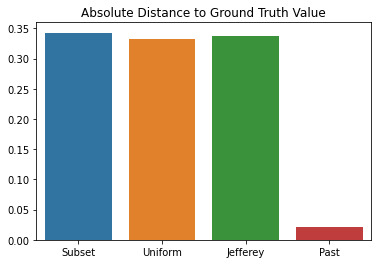

In [ ]:
log_odds_vals=[log_odds_a,log_odds_b,log_odds_c,log_odds_d]
ax = sns.barplot(x=['Subset','Uniform','Jefferey','Past'], y=abs(log_odds_vals-log_odds_all)).set(title='Absolute Distance to Ground Truth Value')

We can infer that the estimation that was done using past data is **significantly** more accurate than the one that was done with general priors.

## Missing Data

In [ ]:
df_final = customized_data()

Reduced features from dataframe


age, height_cm, wage_eur - explanatory variables<br>
overall - explained variable

In [ ]:
features_list = ['age', 'height_cm', 'wage_eur', 'overall']

In [ ]:
data_1000 = df_final[features_list].sample(n=1000, replace=False)
data_1000.dropna(inplace=True)
data_1000.head()

,age,height_cm,wage_eur,overall
12110,20,184,3000.0,64
1794,25,177,58000.0,75
9959,32,184,500.0,65
7733,33,166,10000.0,67
11288,25,176,1000.0,64


We estimate $Y$ using linear regression on the explanatory variables (imputation)

In [ ]:
#calculate beta values of linear regression and CI
def calc_beta_CI(data, features_list, to_print=True):
    X = data[features_list[:-1]].to_numpy()
    X = np.hstack((np.ones((len(X), 1)), X))
    y = data[features_list[-1]].to_numpy()

    beta = np.linalg.lstsq(X, y, rcond=None)[0]
    beta = [round(b, 4) for b in beta]

    y_hat = np.dot(X, beta)
    y_mean = np.mean(y_hat)
    n, p = X.shape

    SSR = ((y_hat - y_mean)**2).sum()
    SSE = ((y - y_hat)**2).sum()
    SST = SSR + SSE

    SSR_df = p - 1
    SSE_df = n - p
    SST_df = n - 1
    MSE = SSE / SSE_df


    C = inv(X.T @ X)
    C_ii = [C[i][i] for i in range(4)]
    se_i = [np.sqrt(c_j*MSE) for c_j in C_ii]
    t_q = t.ppf(0.975, df = n - p)


    cc_list = []
    for k in range(4):
      cc_k = [beta[k] - t_q * se_i[k], beta[k] +  t_q * se_i[k]]
      cc_list.append(cc_k)
      cc_k = list(map(lambda x: round(x, 4), cc_k))
      print(f"Confidence interval for \u03B2{k}:", cc_k)
      print("")

    return beta, cc_list

In [ ]:
beta_b, CI_list_b = calc_beta_CI(data_1000, features_list)
print(beta_b)

Confidence interval for β0: [46.4619, 62.2311]

Confidence interval for β1: [0.4301, 0.5513]

Confidence interval for β2: [-0.0579, 0.0287]

Confidence interval for β3: [0.0002, 0.0002]

[54.3465, 0.4907, -0.0146, 0.0002]


In [ ]:
missing_data_1000 = data_1000.sort_values(by='overall').reset_index()

In [ ]:
#Using the probability p_i, we will generate a random number from a binomial distribution with 1 trial and probability p_i.
#If the random number generated is 1, it is setting the overall value of the current row to None and updating the current row in the df missing_data_1000
#375 = 0.375*1000
for idx, row in missing_data_1000.iterrows():
    idx_plus_1 = idx + 1

    p_i = idx_plus_1 / (375 + idx_plus_1)
    if np.random.binomial(1, p_i):
        row.overall = None
        missing_data_1000.iloc[idx] = row

In [ ]:
percent_of_missing = (missing_data_1000['overall'].isnull().sum() / missing_data_1000.shape[0])
print(f"Percentage of missing values {percent_of_missing:.2%}")

Percentage of missing values 50.00%


In [ ]:
beta_miss, _ = calc_beta_CI(missing_data_1000[~missing_data_1000['overall'].isnull()], features_list)
print(beta_miss)

Confidence interval for β0: [34.914, 56.3358]

Confidence interval for β1: [0.4475, 0.6095]

Confidence interval for β2: [-0.0397, 0.0775]

Confidence interval for β3: [0.0002, 0.0002]

[45.6249, 0.5285, 0.0189, 0.0002]


We will estimate the missing data using regression imputation and the regression coefficients

In [ ]:
missing_data_1000 = missing_data_1000.drop(columns=['index'])
missing_data_1000

,age,height_cm,wage_eur,overall
0,20,180,2000.0,48.0
1,20,175,900.0,49.0
2,17,172,500.0,49.0
3,17,171,500.0,49.0
4,19,178,650.0,49.0
...,...,...,...,...
995,22,180,150000.0,NaN
996,33,180,160000.0,87.0
997,27,183,135000.0,87.0
998,31,185,140000.0,87.0


In [ ]:
missing_data_1000['overall_hat'] = missing_data_1000.apply(lambda x: x.overall if not pd.isnull(x.overall)\
                                                           else np.dot([1, *x[:-1]], beta_miss), axis=1)

In [ ]:
beta, _ = calc_beta_CI(missing_data_1000, ['age', 'height_cm', 'wage_eur', 'overall_hat'])
print(beta)

Confidence interval for β0: [39.9433, 51.0865]

Confidence interval for β1: [0.4863, 0.5719]

Confidence interval for β2: [-0.0111, 0.0501]

Confidence interval for β3: [0.0002, 0.0002]

[45.5149, 0.5291, 0.0195, 0.0002]


We got narrower confidence intervals

In [ ]:
#Assume a linear model
sigma_hat = missing_data_1000['overall'].std()

B = 400
for b in range(B):
    missing_data_1000[f'overall_hat_{b}'] = missing_data_1000.apply(lambda x: x.overall if not pd.isnull(x.overall) \
                                                                    else np.random.normal(np.dot([1, *x[:3]], beta_miss),\
                                                                                          sigma_hat), axis=1)

In [ ]:
#Calculate beta coefficients and s.e
def calc_beta_and_se(data_x, data_y):
    X = data_x.to_numpy()
    X = np.hstack((np.ones((len(X), 1)), X))
    y = data_y.to_numpy()

    beta = np.linalg.lstsq(X, y, rcond=None)[0]

    C = inv(X.T @ X)
    C_ii = [C[i][i] for i in range(X.shape[1])]
    return beta, C_ii

In [ ]:
beta_dict = {}
se_dict = {}

for b in range(B):
    current_y = missing_data_1000[f'overall_hat_{b}']

    beta, se_list = calc_beta_and_se(missing_data_1000[['age', 'height_cm', 'wage_eur']], current_y)
    beta_dict[b] = beta
    se_dict[b] = se_list


In [ ]:
missing_data_1000.tail()

,age,height_cm,wage_eur,overall,overall_hat,overall_hat_0,overall_hat_1,overall_hat_2,overall_hat_3,overall_hat_4,...,overall_hat_390,overall_hat_391,overall_hat_392,overall_hat_393,overall_hat_394,overall_hat_395,overall_hat_396,overall_hat_397,overall_hat_398,overall_hat_399
995,22,180,150000.0,NaN,90.6539,97.072752,78.791422,93.065509,100.028800,77.083111,...,97.138906,94.889001,86.291953,91.775312,102.464547,82.078503,85.568187,95.077899,89.210169,96.035014
996,33,180,160000.0,87.0,87.0000,87.000000,87.000000,87.000000,87.000000,87.000000,...,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
997,27,183,135000.0,87.0,87.0000,87.000000,87.000000,87.000000,87.000000,87.000000,...,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
998,31,185,140000.0,87.0,87.0000,87.000000,87.000000,87.000000,87.000000,87.000000,...,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
999,32,185,270000.0,NaN,120.0334,105.961251,116.378063,119.338513,118.638439,115.347423,...,110.487473,121.009638,118.145142,120.119942,115.791046,134.360355,114.911546,118.585876,124.074006,130.232988


In [ ]:
beta_0, beta_1, beta_2, beta_3 =  list(zip(*beta_dict.values()))

In [ ]:
beta_0_MI = np.mean(beta_0)
beta_1_MI = np.mean(beta_1)
beta_2_MI = np.mean(beta_2)
beta_3_MI = np.mean(beta_3)

beta_MI = [beta_0_MI, beta_1_MI, beta_2_MI, beta_3_MI]
beta_MI

[45.644802836677044,
 0.5308594033761358,
 0.018501365319641354,
 0.00020379739870392155]

We will use Rubin's formula to calculate the
s.e is estimated and a confidence interval is calculated

In [ ]:
se_0, se_1, se_2, se_3 =  list(zip(*se_dict.values()))

In [ ]:
robin_var_b_0 = np.mean(se_0) + ((B+1) / (B*(B-1))) * sum((np.array(beta_0) - beta_0_MI)**2)
robin_var_b_1 = np.mean(se_1) + ((B+1) / (B*(B-1))) * sum((np.array(beta_1) - beta_1_MI)**2)
robin_var_b_2 = np.mean(se_2) + ((B+1) / (B*(B-1))) * sum((np.array(beta_2) - beta_2_MI)**2)
robin_var_b_3 = np.mean(se_3) + ((B+1) / (B*(B-1))) * sum((np.array(beta_3) - beta_3_MI)**2)

In [ ]:
z_q = stats.norm.ppf(0.975)

CI_0 = [beta_0_MI - z_q * np.sqrt(robin_var_b_0), beta_0_MI + z_q * np.sqrt(robin_var_b_0)]
CI_1 = [beta_1_MI - z_q * np.sqrt(robin_var_b_1), beta_1_MI + z_q * np.sqrt(robin_var_b_1)]
CI_2 = [beta_2_MI - z_q * np.sqrt(robin_var_b_2), beta_2_MI + z_q * np.sqrt(robin_var_b_2)]
CI_3 = [beta_3_MI - z_q * np.sqrt(robin_var_b_3), beta_3_MI + z_q * np.sqrt(robin_var_b_3)]

CI_list = [CI_0, CI_1, CI_2, CI_3]

for i in range(4):
    CI_i = CI_list[i]
    print(f"Confidence interval for β{i}: {list(map(lambda x: round(x, 4), CI_i))}")

Confidence interval for β0: [37.3095, 53.9801]
Confidence interval for β1: [0.4705, 0.5912]
Confidence interval for β2: [-0.0269, 0.0639]
Confidence interval for β3: [0.0002, 0.0002]


### Using logistic regression to compute $P(R=1 \mid X_1, \dots, X_k)$

In [ ]:
missing_data_1000 = missing_data_1000.drop(columns=[f'overall_hat_{b}' for b in range(B)] + ['overall_hat'])
missing_data_1000.head()

,age,height_cm,wage_eur,overall
0,20,180,2000.0,48.0
1,20,175,900.0,49.0
2,17,172,500.0,49.0
3,17,171,500.0,49.0
4,19,178,650.0,49.0


In [ ]:
missing_data_1000['R'] = (~missing_data_1000['overall'].isnull()).astype(int)
missing_data_1000.head()

,age,height_cm,wage_eur,overall,R
0,20,180,2000.0,48.0,1
1,20,175,900.0,49.0,1
2,17,172,500.0,49.0,1
3,17,171,500.0,49.0,1
4,19,178,650.0,49.0,1


In [ ]:
features_list_logi = ['age', 'height_cm', 'wage_eur', 'R']

In [ ]:
from sklearn.linear_model import LogisticRegression

X_logi = missing_data_1000[features_list_logi[:-1]].to_numpy()
y_logi = missing_data_1000[features_list_logi[-1]].to_numpy()

logi_reg = LogisticRegression(random_state=0).fit(X_logi, y_logi)

beta_0_logi = logi_reg.intercept_
beta_hat_logi = logi_reg.coef_
print(f"\u03B2={beta_0_logi[0], list(beta_hat_logi[0])}")

β=(-1.9226323902928227e-05, [-0.03936924714878963, 0.006263278988500061, -1.5836542918855315e-05])


In [ ]:
def calc_pi_i_hat(beta, x):
    return np.exp(np.dot(beta, x)) / (1 + np.exp(np.dot(beta, x)))

In [ ]:
missing_data_1000['P_R'] = missing_data_1000.apply(lambda x: calc_pi_i_hat([beta_0_logi[0], *beta_hat_logi[0]], \
                                                                           [1, *x[:3]]) ,axis=1)
missing_data_1000

,age,height_cm,wage_eur,overall,R,P_R
0,20,180,2000.0,48.0,1,0.576473
1,20,175,900.0,49.0,1,0.573077
2,17,172,500.0,49.0,1,0.598704
3,17,171,500.0,49.0,1,0.597199
4,19,178,650.0,49.0,1,0.588201
...,...,...,...,...,...,...
995,22,180,150000.0,NaN,0,0.107721
996,33,180,160000.0,87.0,1,0.062640
997,27,183,135000.0,87.0,1,0.113574
998,31,185,140000.0,87.0,1,0.092888


We will present the linear regression problem as a least squares method and using the weights we received in the previous section to calculate an IPW estimator for the regression coefficients

In [ ]:
only_not_miss = missing_data_1000[~missing_data_1000['overall'].isnull()]
only_not_miss

,age,height_cm,wage_eur,overall,R,P_R
0,20,180,2000.0,48.0,1,0.576473
1,20,175,900.0,49.0,1,0.573077
2,17,172,500.0,49.0,1,0.598704
3,17,171,500.0,49.0,1,0.597199
4,19,178,650.0,49.0,1,0.588201
...,...,...,...,...,...,...
987,26,186,145000.0,82.0,1,0.103870
988,30,188,120000.0,83.0,1,0.129658
996,33,180,160000.0,87.0,1,0.062640
997,27,183,135000.0,87.0,1,0.113574


In [ ]:
only_not_miss['overall/P_R'] = only_not_miss['overall'] / only_not_miss['P_R']
only_not_miss['age/P_R'] = only_not_miss['age'] / only_not_miss['P_R']
only_not_miss['height_cm/P_R'] = only_not_miss['height_cm'] / only_not_miss['P_R']
only_not_miss['wage_eur/P_R'] = only_not_miss['wage_eur'] / only_not_miss['P_R']
only_not_miss['1/P_R'] = 1 / only_not_miss['P_R']

The problem is now a least squares with the following $X,y$

In [ ]:
y = (only_not_miss['overall/P_R']).to_numpy()
X = only_not_miss[['1/P_R', 'age/P_R', 'height_cm/P_R', 'wage_eur/P_R']].to_numpy()

In [ ]:
#Calculation of beta and s.e for the regression coefficients
def calc_beta_and_se_for_IPW(data_x, data_y):
    X = data_x.to_numpy()
    y = data_y.to_numpy()
    beta = np.linalg.lstsq(X, y, rcond=None)[0]

    C = inv(X.T @ X)
    C_ii = [C[i][i] for i in range(X.shape[1])]
    return beta, C_ii

In [ ]:
beta_dict = {}
se_dict = {}

for b in range(B):
    only_not_miss_current = only_not_miss.sample(n=only_not_miss.shape[0], replace=True)
    current_y = only_not_miss_current['overall/P_R']
    beta, se_list = calc_beta_and_se_for_IPW(only_not_miss_current[['1/P_R', 'age/P_R', 'height_cm/P_R', 'wage_eur/P_R']], current_y)
    beta_dict[b] = beta
    se_dict[b] = se_list


In [ ]:
beta_0, beta_1, beta_2, beta_3 =  list(zip(*beta_dict.values()))
list_of_beta_lists = [beta_0, beta_1, beta_2, beta_3]

In [ ]:
CI_list_g = []
for i in range(4):
    beta_i_list = list(list_of_beta_lists[i])
    beta_i_list.sort()
    CI = [np.quantile(beta_i_list, 0.025), np.quantile(beta_i_list, 0.975)]
    CI_list_g.append(CI)
    CI = list(map(lambda x: round(x, 5), CI))
    print(f"Confidence interval for \u03B2{i}:", CI)
    print("")

Confidence interval for β0: [36.4429, 60.83976]

Confidence interval for β1: [0.34822, 0.58731]

Confidence interval for β2: [-0.05677, 0.08481]

Confidence interval for β3: [0.00013, 0.00018]



In [ ]:
CI_list_b

[[46.46191268912053, 62.23108731087947],
 [0.43006698006162825, 0.5513330199383718],
 [-0.057901466854391195, 0.02870146685439119],
 [0.0001854493846135238, 0.00021455061538647622]]

In [ ]:
CI_list_g

[[36.442897384359306, 60.83975814115616],
 [0.3482150730636115, 0.5873121015877043],
 [-0.05677452355869886, 0.08480961244192559],
 [0.0001300639661071773, 0.00018199947958357496]]

We found that the confidence intervals using IPW is around 50% wider than the one based on the complete data.

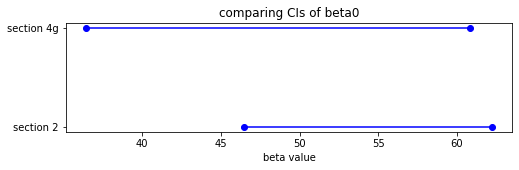

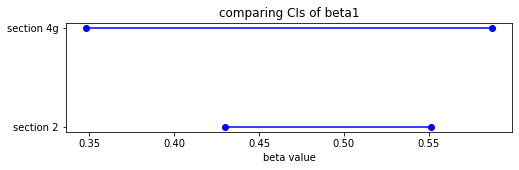

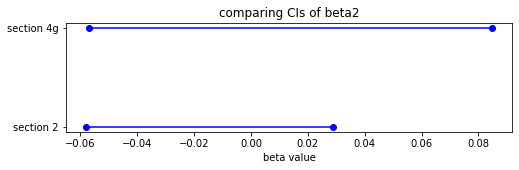

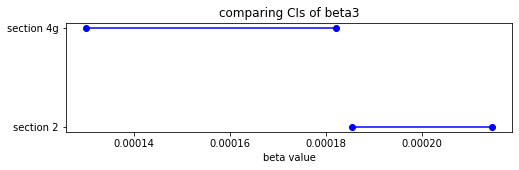

In [ ]:
for i in range(4):
    data_dict = {}
    data_dict['category'] = ['section 2','section 4g']
    data_dict['lower'] = [CI_list_b[i][0] ,CI_list_g[i][0]]
    data_dict['upper'] = [CI_list_b[i][1] ,CI_list_g[i][1]]
    dataset = pd.DataFrame(data_dict)

    plt.figure(figsize = (8,2))
    plt.title(f"comparing CIs of beta{i}")
    for lower,upper,y in zip(dataset['lower'],dataset['upper'],range(len(dataset))):
        plt.plot((lower,upper),(y,y),'ro-',color='blue')
    plt.yticks(range(len(dataset)),list(dataset['category']))
    plt.xlabel("beta value")
    plt.plot()

After looking at the graph we can see that the IPW CIs are wider, but still close to the values we got in the past.